Blocco iniziale da usare sempre

In [2]:
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import fastf1.plotting as f1plt
import fastf1.utils as f1u
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta
from fastf1.core import Laps

Q = ff1.get_session(2024, 'Austin', 4)
Q.load(weather=True)

Q2023 = ff1.get_session(2023, 'Austin', 2)
Q2023.load(weather=True)

SQ = ff1.get_session(2024, 'Austin', 2)
SQ.load()

SQ2023 = ff1.get_session(2023, 'Austin', 3)
SQ2023.load()

SR = ff1.get_session(2024, 'Austin', 3)
SR.load()

SR2023 = ff1.get_session(2023, 'Austin', 4)
SR2023.load()

R = ff1.get_session(2024, 'Austin', 5)
R.load()

R2023 = ff1.get_session(2023, 'Austin', 5)
R2023.load()

drivers = ['NOR', 'VER', 'SAI', 'LEC', 'PIA', 'RUS', 'GAS', 'ALO', 'MAG', 'PER', 'TSU', 'HUL', 'OCO', 'STR', 'LAW', 'ALB', 'COL', 'BOT', 'HAM', 'ZHO']
drivers2023 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA', 'TSU', 'ZHO', 'BOT', 'MAG', 'RIC', 'HUL', 'ALO', 'ALB', 'STR', 'SAR']

req         WARNING 	DEFAULT CACHE ENABLED! (1.96 GB) C:\Users\giacomotommi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']

Carico colori e associazioni

In [227]:
plt.rc('figure', figsize=(15.0, 10.0))
mpl.rcParams['figure.facecolor'] = 'None' # Il colore di sfondo del grafico seguirà quello del PowerPoint
mpl.rcParams['axes.facecolor'] = 'None'
f1plt.setup_mpl(color_scheme=None)

### Colori
colors_palette = {
    'Red Bull': '#CCA9DD',
    'Ferrari': '#CB3234',
    'Mercedes': '#A3E7D6',
    'Alpine': '#99D6EA',
    'Kick Sauber': '#641C34',
    'McLaren': '#EFA94A',
    'Haas': '#987654',
    'RB': '#1E213D',
    'Williams': '#4592CE',
    'Aston Martin': '#216477',
    '2024': '#CDA434',
    '2023': '#ABCDEF',
    'SQ': '#177245'
}

### Associazione Pilota --> Squadra
driver_team = {
    'VER': 'Red Bull',
    'HAM': 'Mercedes',
    'LEC': 'Ferrari',
    'NOR': 'McLaren',
    'PER': 'Red Bull',
    'SAI': 'Ferrari',
    'GAS': 'Alpine',
    'RUS': 'Mercedes',
    'ALB': 'Williams',
    'PIA': 'McLaren',
    'OCO': 'Alpine',
    'RIC': 'RB',
    'ALO': 'Aston Martin',
    'TSU': 'RB',
    'HUL': 'Haas',
    'BOT': 'Kick Sauber',
    'ZHO': 'Kick Sauber',
    'MAG': 'Haas',
    'SAR': 'Williams',
    'STR': 'Aston Martin',
    'LAW': 'RB',
    'COL':'Williams'
}

c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


Grafico velocità media raggiunta sul rettilineo per ogni team nel 2023 e nel 2024   (Grafico numero 10 della scaletta)

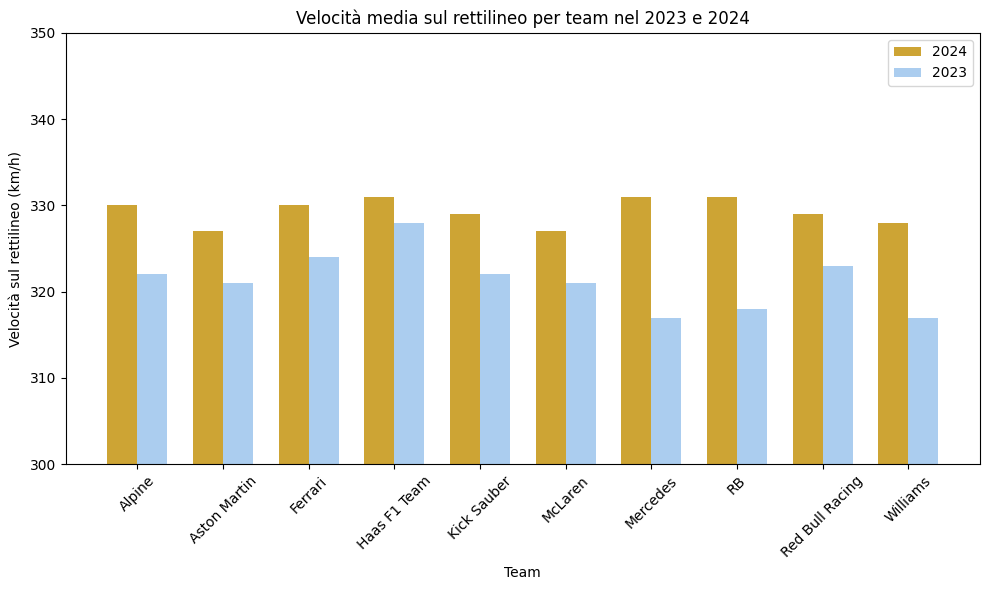

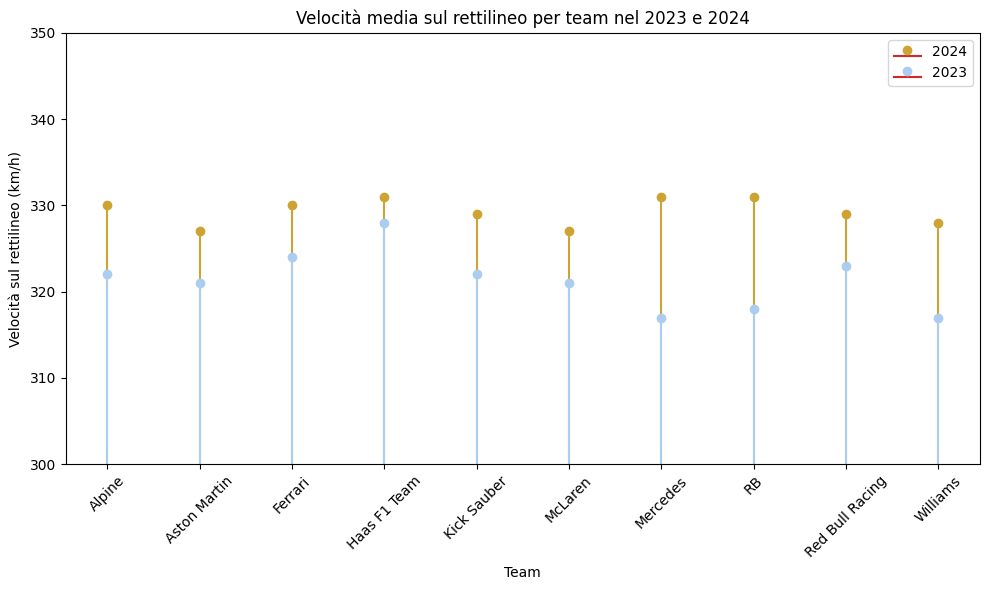

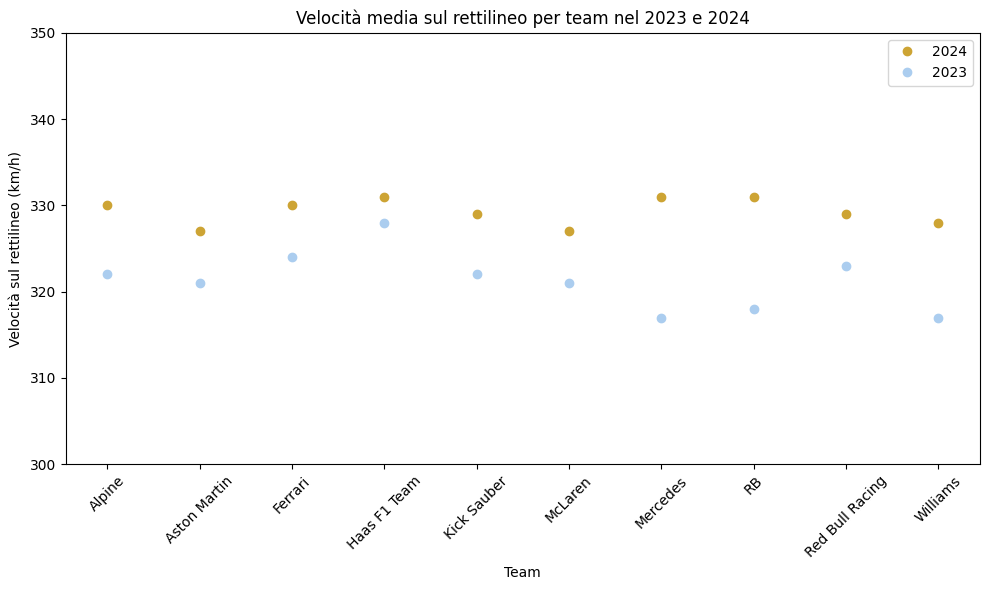

In [228]:
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

velocita_media_sul_dritto_2024 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = velocita_media_sul_dritto_2024.groupby('Team').mean().round(0)

Q1, Q2, Q3 = Q2023.laps.split_qualifying_sessions()
velocita_media_sul_dritto_2023 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.groupby('Team').mean().round(0)
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.rename(index={'Alfa Romeo': 'Kick Sauber', 'AlphaTauri': 'RB'})
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.sort_index()

#opzione bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(velocita_media_sul_dritto_2024.index))

plt.bar(index, velocita_media_sul_dritto_2024['SpeedST'], bar_width, color=colors_palette['2024'], label='2024')
plt.bar(index + bar_width, velocita_media_sul_dritto_2023['SpeedST'], bar_width, color=colors_palette['2023'], label='2023')
plt.xticks(index + bar_width / 2, velocita_media_sul_dritto_2024.index)
plt.xlabel('Team')
plt.ylabel('Velocità sul rettilineo (km/h)')
plt.title('Velocità media sul rettilineo per team nel 2023 e 2024')
plt.legend()
plt.ylim(300, 350)
plt.xticks(rotation=45)
plt.tight_layout()

#opzione stem plot
plt.figure(figsize=(10, 6))
plt.stem(velocita_media_sul_dritto_2024.index, velocita_media_sul_dritto_2024['SpeedST'], label='2024', linefmt=colors_palette['2024'], markerfmt=f'{colors_palette['2024']}')
plt.stem(velocita_media_sul_dritto_2023.index, velocita_media_sul_dritto_2023['SpeedST'], label='2023', linefmt=colors_palette['2023'], markerfmt=colors_palette['2023'])
plt.xlabel('Team')
plt.ylabel('Velocità sul rettilineo (km/h)')
plt.title('Velocità media sul rettilineo per team nel 2023 e 2024')
plt.legend()
plt.ylim(300, 350)
plt.xticks(rotation=45)
plt.tight_layout()

#opzione line plot senza line
plt.figure(figsize=(10, 6))
plt.plot(velocita_media_sul_dritto_2024.index, velocita_media_sul_dritto_2024['SpeedST'], 'o', label='2024', color=colors_palette['2024'])
plt.plot(velocita_media_sul_dritto_2023.index, velocita_media_sul_dritto_2023['SpeedST'], 'o', label='2023', color=colors_palette['2023'])
plt.xlabel('Team')
plt.ylabel('Velocità sul rettilineo (km/h)')
plt.title('Velocità media sul rettilineo per team nel 2023 e 2024')
plt.legend()
plt.ylim(300, 350)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico rappresentante il tempo migliore per ogni giro di gara che sia stato fatto con bandiera verde (tracciato libero senza problemi) nel 2023 e nel 2024 (opzioni del grafico 12 della scaletta)

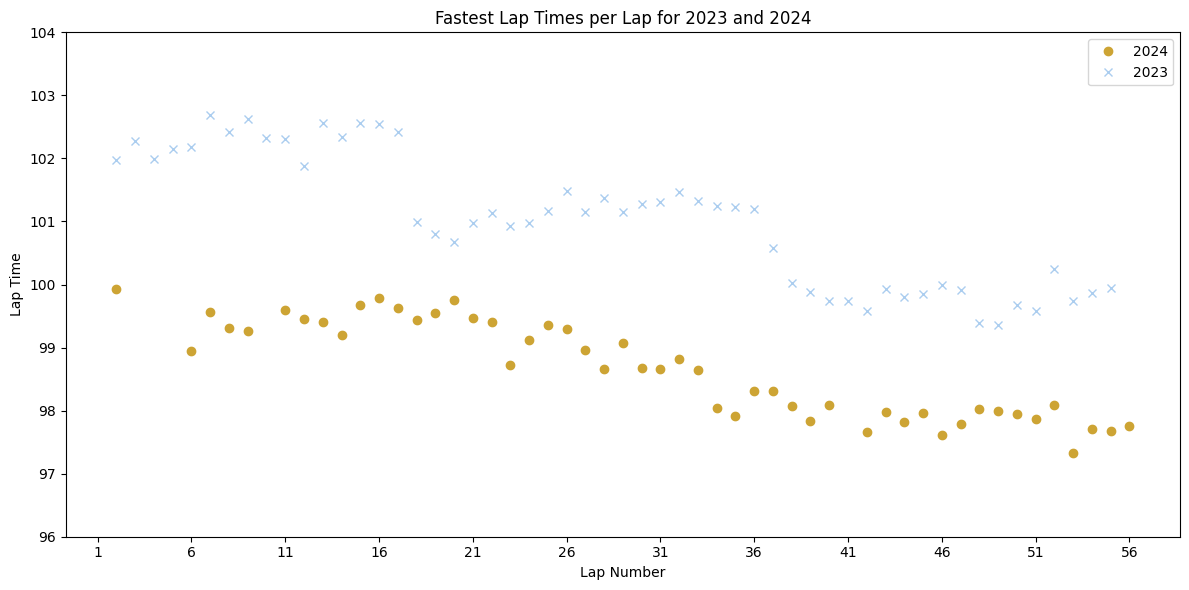

In [22]:
race_2024_fastest_laps = pd.DataFrame()
race_2023_fastest_laps = pd.DataFrame()

for i in range(2, 57):
    fastest_lap = R.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2024_fastest_laps = pd.concat([race_2024_fastest_laps, fastest_lap])

for i in range(2, 57):
    fastest_lap = R2023.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2023_fastest_laps = pd.concat([race_2023_fastest_laps, fastest_lap])
    
plt.figure(figsize=(12, 6))

plt.plot(race_2024_fastest_laps['LapNumber'], race_2024_fastest_laps['LapTime'], 'o', label='2024', color=colors_palette['2024'])
plt.plot(race_2023_fastest_laps['LapNumber'], race_2023_fastest_laps['LapTime'], 'x', label='2023', color=colors_palette['2023'])
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Fastest Lap Times per Lap for 2023 and 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.ylim(96, 104)
plt.tight_layout()
plt.show()


Tempo sul giro di ogni giro di gara del vincitore del 2023 e del vincitore del 2024, evidenziati per ogni stint effettuato (opzione del grafico 12)

[np.float64(98.8326221682421), np.float64(98.81218966397356), np.float64(98.79175715970501), np.float64(98.77132465543647), np.float64(98.75089215116793), np.float64(98.73045964689939), np.float64(98.71002714263086), np.float64(98.68959463836232), np.float64(98.66916213409378), np.float64(98.64872962982524), np.float64(98.6282971255567), np.float64(98.60786462128816), np.float64(98.58743211701962), np.float64(98.54656710848253), np.float64(98.52613460421401), np.float64(98.50570209994547), np.float64(98.48526959567693), np.float64(98.46483709140838), np.float64(98.44440458713984), np.float64(98.4239720828713), np.float64(98.40353957860276), np.float64(98.38310707433422), np.float64(98.36267457006568), np.float64(98.34224206579714), np.float64(98.32180956152861), np.float64(98.30137705726007), np.float64(98.28094455299153), np.float64(98.26051204872299)]


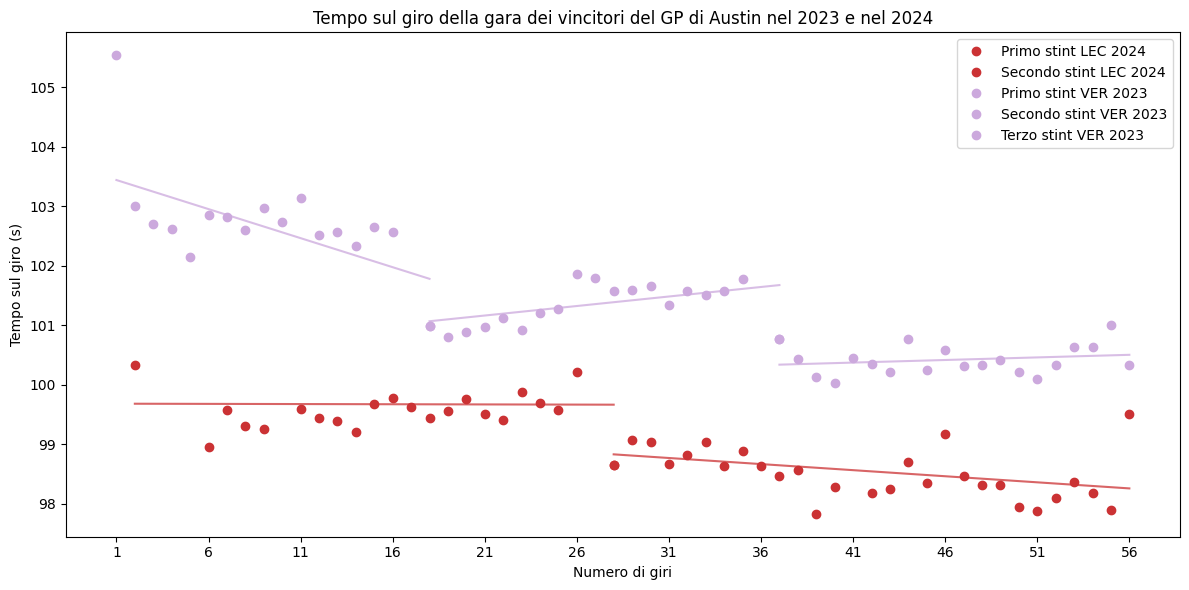

In [29]:
laps_vincitore_2024 = R.laps.pick_drivers('LEC').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2024['LapTime'] = laps_vincitore_2024['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2024 = laps_vincitore_2024[laps_vincitore_2024['TrackStatus'] == '1']

laps_vincitore_2023 = R2023.laps.pick_drivers('VER').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2023['LapTime'] = laps_vincitore_2023['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2023 = laps_vincitore_2023[laps_vincitore_2023['TrackStatus'] == '1']

laps_primoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] <= 28.0]
laps_secondoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] >= 28.0]

laps_primoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] <= 18.0]
laps_secondoStint_2023 = laps_vincitore_2023[(laps_vincitore_2023['LapNumber'] >= 18.0) & (laps_vincitore_2023['LapNumber'] <= 37.0)]
laps_terzoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] >= 37.0]

plt.figure(figsize=(12, 6))

plt.plot(laps_primoStint_2024['LapNumber'], laps_primoStint_2024['LapTime'], 'o', label='Primo stint LEC 2024', color=colors_palette['Ferrari'])
plt.plot(laps_secondoStint_2024['LapNumber'], laps_secondoStint_2024['LapTime'], 'o', label='Secondo stint LEC 2024', color=colors_palette['Ferrari'])
plt.plot(laps_primoStint_2023['LapNumber'], laps_primoStint_2023['LapTime'], 'o', label='Primo stint VER 2023', color=colors_palette['Red Bull'])
plt.plot(laps_secondoStint_2023['LapNumber'], laps_secondoStint_2023['LapTime'], 'o', label='Secondo stint VER 2023', color=colors_palette['Red Bull'])
plt.plot(laps_terzoStint_2023['LapNumber'], laps_terzoStint_2023['LapTime'], 'o', label='Terzo stint VER 2023', color=colors_palette['Red Bull'])

from scipy import stats
def trend(x):
    return slope * x + intercept

slope, intercept, _, _, _ = stats.linregress(laps_primoStint_2024.index, laps_primoStint_2024.LapTime)
line_trend_L1 = list(map(trend, laps_primoStint_2024['LapNumber']))
plt.plot(laps_primoStint_2024['LapNumber'], line_trend_L1, color = colors_palette['Ferrari'], alpha=.75)

def trnd(x):
    return slope * x + intercept -4.5
slope, intercept, _, _, _ = stats.linregress(laps_secondoStint_2024.index, laps_secondoStint_2024.LapTime)
line_trend_L1 = list(map(trnd, laps_secondoStint_2024['LapNumber']))
print(line_trend_L1)
plt.plot(laps_secondoStint_2024['LapNumber'], line_trend_L1, color = colors_palette['Ferrari'], alpha=.75)

slope, intercept, _, _, _ = stats.linregress(laps_primoStint_2023.index, laps_primoStint_2023.LapTime)
line_trend_L1 = list(map(trend, laps_primoStint_2023['LapNumber']))
plt.plot(laps_primoStint_2023['LapNumber'], line_trend_L1, color = colors_palette['Red Bull'], alpha=.75)

slope, intercept, _, _, _ = stats.linregress(laps_secondoStint_2023.index, laps_secondoStint_2023.LapTime)
line_trend_L1 = list(map(trend, laps_secondoStint_2023['LapNumber']))
plt.plot(laps_secondoStint_2023['LapNumber'], line_trend_L1, color = colors_palette['Red Bull'], alpha=.75)

slope, intercept, _, _, _ = stats.linregress(laps_terzoStint_2023.index, laps_terzoStint_2023.LapTime)
line_trend_L1 = list(map(trend, laps_terzoStint_2023['LapNumber']))
plt.plot(laps_terzoStint_2023['LapNumber'], line_trend_L1, color = colors_palette['Red Bull'], alpha=.75)

plt.xlabel('Numero di giri')
plt.ylabel('Tempo sul giro (s)')
plt.title('Tempo sul giro della gara dei vincitori del GP di Austin nel 2023 e nel 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.tight_layout()
plt.show()

Due opzioni di un grafico sulla velocità media mantenuta nel q2 e nel q3 delle qualifiche del 2023 e del 2024, considerando tutti i giri validi con un tempo inferiore al 107% dal giro della pole (grafico 3 della qualifica)

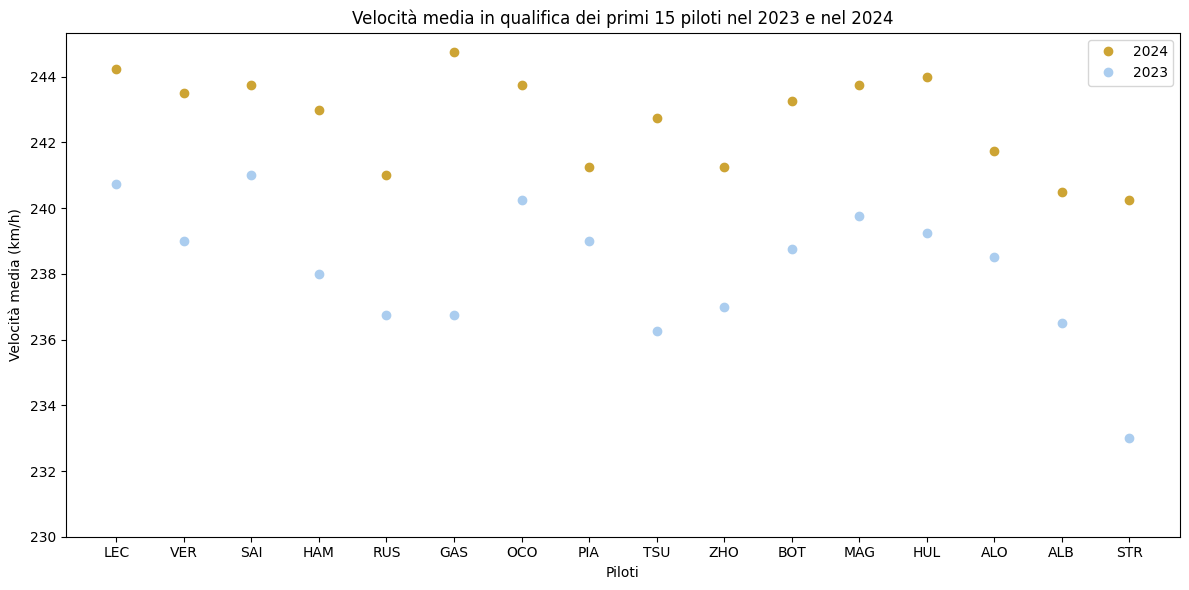

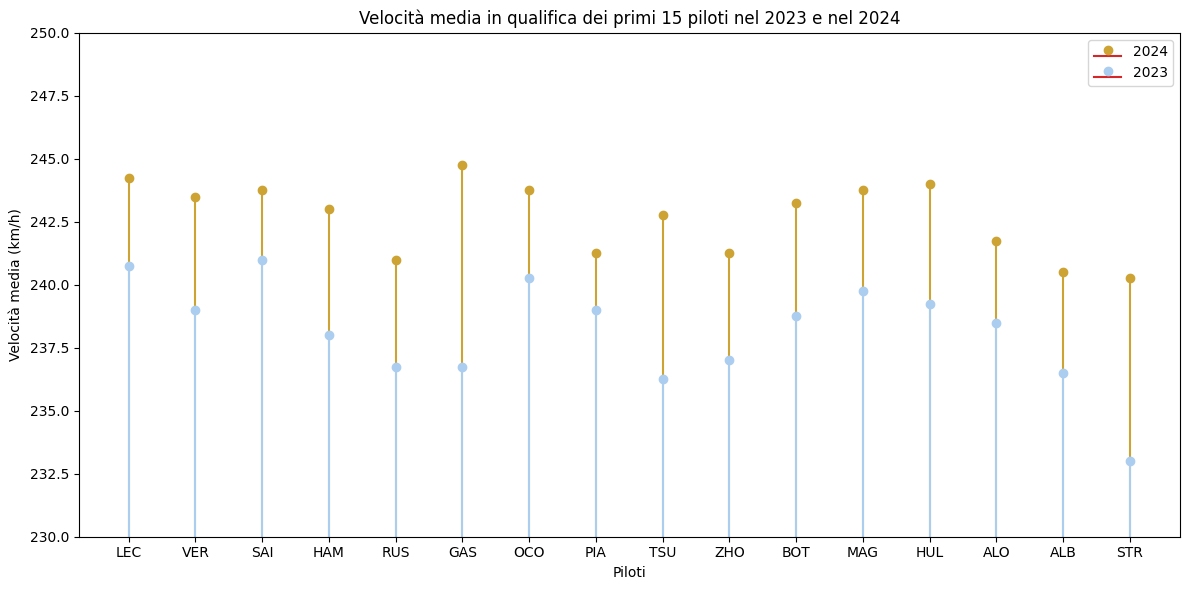

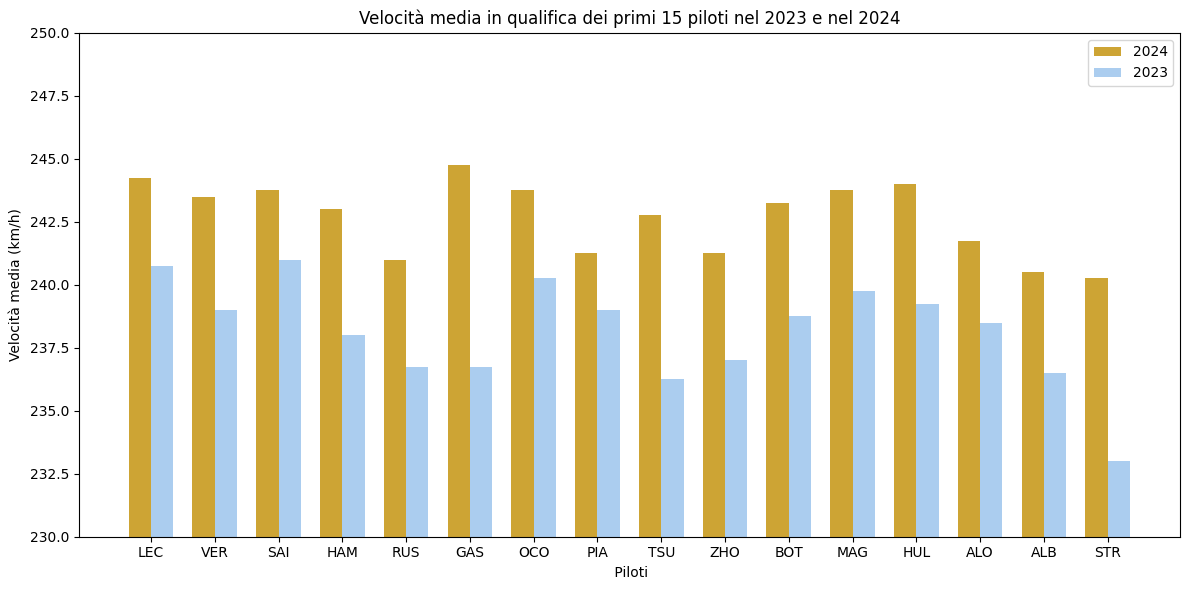

In [47]:
driver = ['LEC', 'VER', 'SAI', 'HAM', 'RUS', 'GAS', 'OCO', 'PIA', 'TSU', 'ZHO', 'BOT', 'MAG', 'HUL', 'ALO', 'ALB', 'STR']

piloti_media_2024 = pd.DataFrame()
for drv in driver:
    pl = Q.laps.pick_drivers(drv).pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team', 'LapTime']].sort_values(by='LapTime').head(1)
    piloti_media_2024 = pd.concat([piloti_media_2024, pl])
speedAvg2024 = piloti_media_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
piloti_media_2024 = piloti_media_2024.assign(SpeedAvg=speedAvg2024)

piloti_media_2023 = pd.DataFrame()
for drv in driver:
    pl = Q2023.laps.pick_drivers(drv).pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team', 'LapTime']].sort_values(by='LapTime').head(1)
    piloti_media_2023 = pd.concat([piloti_media_2023, pl])
speedAvg2023 = piloti_media_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
piloti_media_2023 = piloti_media_2023.assign(SpeedAvg=speedAvg2023)

#avg_speed_2024 = avg_speed_2024[(avg_speed_2024['SpeedAvg'] > avg_speed_2024['SpeedAvg'].quantile(0.05)) & (avg_speed_2024['SpeedAvg'] < avg_speed_2024['SpeedAvg'].quantile(0.95))]
#piloti_media_2023 = piloti_media_2023[(piloti_media_2023['SpeedAvg'] > piloti_media_2023['SpeedAvg'].quantile(0.05)) & (piloti_media_2023['SpeedAvg'] < piloti_media_2023['SpeedAvg'].quantile(0.95))]

#opzione line plot
plt.figure(figsize=(12, 6))

plt.plot(piloti_media_2024["Driver"], piloti_media_2024['SpeedAvg'], 'o', color=colors_palette['2024'], label='2024')
plt.plot(piloti_media_2023['Driver'], piloti_media_2023['SpeedAvg'], 'o', color=colors_palette['2023'], label='2023')
plt.xlabel('Piloti')
plt.ylabel('Velocità media (km/h)')
plt.title('Velocità media in qualifica dei primi 15 piloti nel 2023 e nel 2024')
plt.legend()
plt.yticks(np.arange(230, 246, 2))
plt.tight_layout()
plt.show()

#opzione stem plot
plt.figure(figsize=(12, 6))
plt.stem(piloti_media_2024['Driver'], piloti_media_2024['SpeedAvg'], label='2024', linefmt=colors_palette['2024'], markerfmt=f'{colors_palette['2024']}')
plt.stem(piloti_media_2023['Driver'], piloti_media_2023['SpeedAvg'], label='2023', linefmt=colors_palette['2023'], markerfmt=colors_palette['2023'])
plt.xlabel('Piloti')
plt.ylabel('Velocità media (km/h)')
plt.title('Velocità media in qualifica dei primi 15 piloti nel 2023 e nel 2024')
plt.legend()
plt.ylim(230, 250)
plt.tight_layout()
plt.show()

#opzione bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(piloti_media_2024.index))
plt.bar(index, piloti_media_2024['SpeedAvg'], bar_width, label='2024', color=colors_palette['2024'])
plt.bar(index + bar_width, piloti_media_2023['SpeedAvg'], bar_width,  label='2023', color=colors_palette['2023'])
plt.xticks(index + bar_width / 2, piloti_media_2024['Driver'])
plt.xlabel(' Piloti')
plt.ylabel('Velocità media (km/h)')
plt.title('Velocità media in qualifica dei primi 15 piloti nel 2023 e nel 2024')
plt.legend()
plt.ylim(230, 250)
plt.tight_layout()
plt.show()

Confronto top 10 della qualifica sprint (venerdì) e della qualifica normale (sabato) del 2024 per vedere la gommatura (grafico 14 della scaletta)

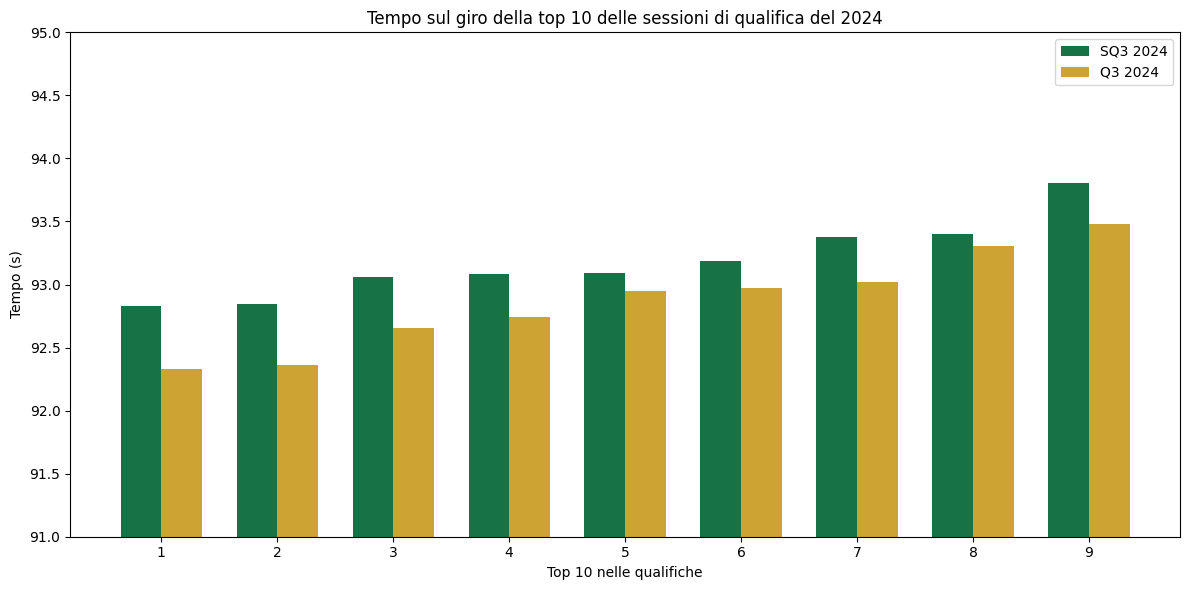

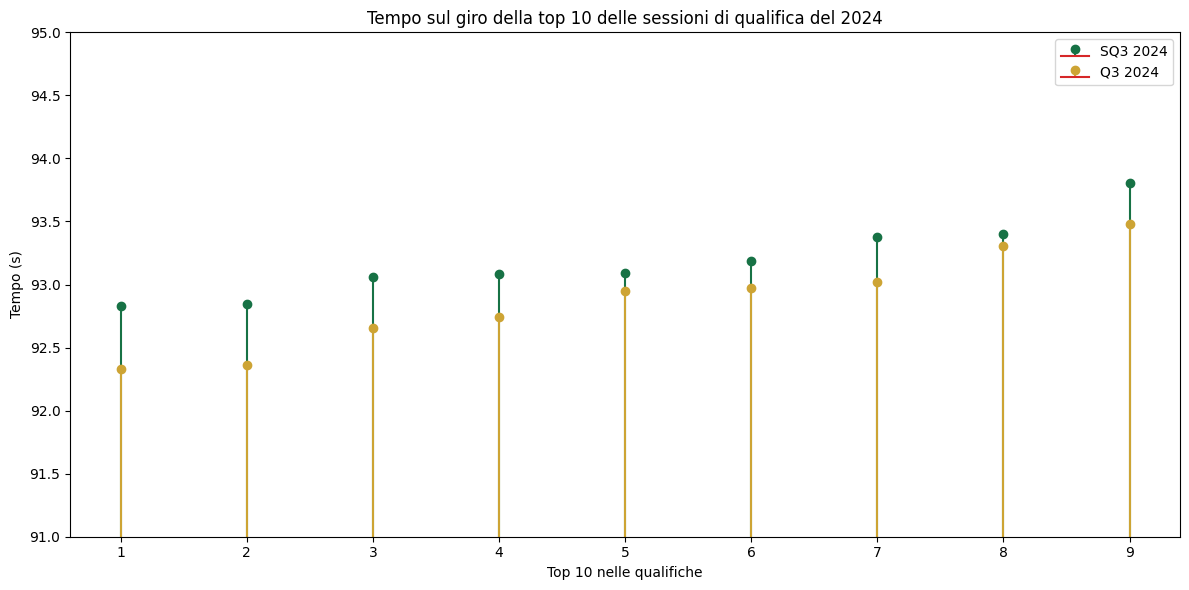

In [66]:
_, _, SQ3 = SQ.laps.split_qualifying_sessions()
_, _, Q3= Q.laps.split_qualifying_sessions()

driversQ3 = pd.unique(Q.laps['Driver'])[:9]
driversSQ3 = ['VER', 'RUS', 'LEC', 'NOR', 'SAI','HUL', 'HAM', 'MAG', 'TSU']

fastest_laps_Q3 = pd.DataFrame()
fastest_laps_SQ3 = pd.DataFrame()

i = 1
for driver in driversQ3:
    fastest_lap = Q3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3 = pd.concat([fastest_laps_Q3, fastest_lap])

i = 1
for driver in driversSQ3:
    fastest_lap = SQ3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3 = pd.concat([fastest_laps_SQ3, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3.set_index("DriverPosition", inplace=True)
fastest_laps_Q3.set_index("DriverPosition", inplace=True)

# opzione bar plot
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(fastest_laps_SQ3.index))
plt.bar(index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()), bar_width, color=colors_palette['SQ'],  label='SQ3 2024')
plt.bar(index + bar_width, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()), bar_width, color=colors_palette['2024'], label='Q3 2024')
plt.xticks(index + bar_width / 2, np.arange(1, 10))

plt.xlabel('Top 10 nelle qualifiche')
plt.ylabel('Tempo (s)')
plt.title('Tempo sul giro della top 10 delle sessioni di qualifica del 2024')
plt.legend()
plt.ylim(91, 95)

plt.tight_layout()
plt.show()

# opzione stem plot
plt.figure(figsize=(12, 6))

plt.stem(fastest_laps_SQ3.index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()), label='SQ3 2024', linefmt=colors_palette['SQ'], markerfmt=colors_palette['SQ'])
plt.stem(fastest_laps_Q3.index, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()), label='Q3 2024', linefmt=colors_palette['2024'], markerfmt=colors_palette['2024'])

plt.xlabel('Top 10 nelle qualifiche')
plt.ylabel('Tempo (s)')
plt.title('Tempo sul giro della top 10 delle sessioni di qualifica del 2024')
plt.legend()
plt.ylim(91, 95)

plt.tight_layout()
plt.show()

Confronto top 10 della qualifica sprint del 2023 (sabato) e della qualifica normale del 2024 (sabato) per vedere la differenza fra due qualifiche fatte nella stessa giornata (grafico 14 della scaletta)

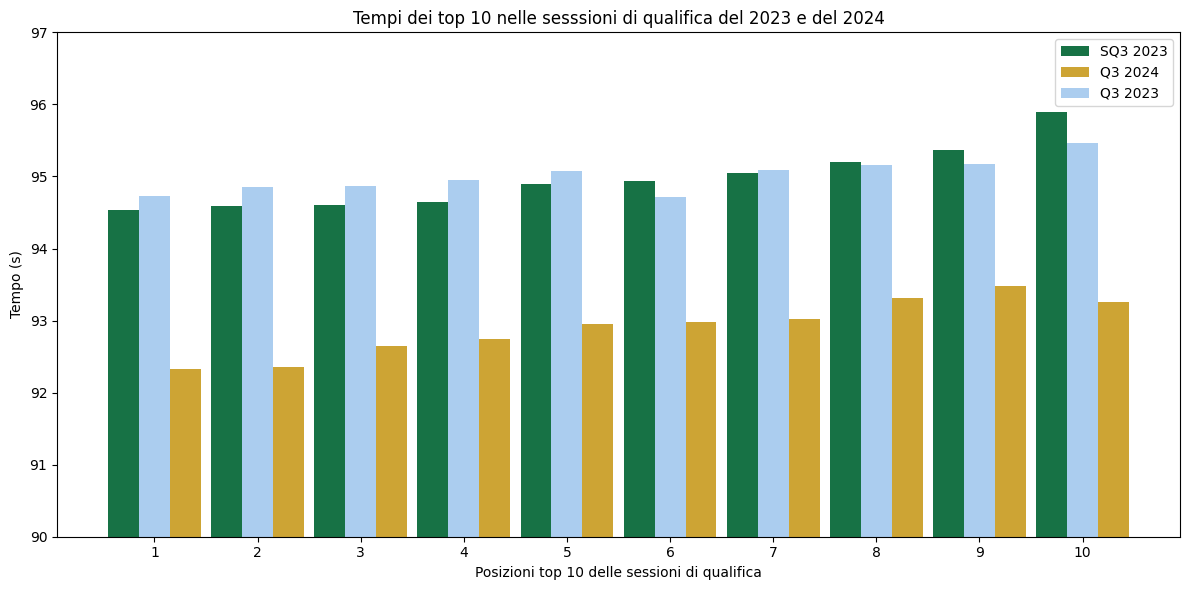

In [116]:
_, _, top10_qsprint_2023 = SQ2023.laps.split_qualifying_sessions()
_, _, top10_q_2023 = Q2023.laps.split_qualifying_sessions()
_, _, top10_q_2024 = Q.laps.split_qualifying_sessions()

driversQ3_2024 = ['NOR', 'VER', 'SAI', 'LEC', 'PIA', 'RUS', 'GAS', 'ALO', 'MAG', 'PER']
driversSQ3_2023 = ['VER', 'LEC', 'HAM', 'NOR', 'PIA','SAI', 'PER', 'RUS', 'ALB', 'GAS']
driversQ3_2023 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA']

fastest_laps_Q3_2024 = pd.DataFrame()
fastest_laps_SQ3_2023 = pd.DataFrame()
fastest_laps_Q3_2023 = pd.DataFrame()

i = 1
for driver in driversQ3_2024:
    fastest_lap = top10_q_2024.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3_2024 = pd.concat([fastest_laps_Q3_2024, fastest_lap])

i = 1
for driver in driversSQ3_2023:
    fastest_lap = top10_qsprint_2023.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3_2023 = pd.concat([fastest_laps_SQ3_2023, fastest_lap])

i = 1
for driver in driversQ3_2023:
    fastest_lap = top10_q_2023.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3_2023 = pd.concat([fastest_laps_Q3_2023, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3_2023.set_index("DriverPosition", inplace=True)
fastest_laps_Q3_2024.set_index("DriverPosition", inplace=True)
fastest_laps_Q3_2023.set_index("DriverPosition", inplace=True)

# Plot the fastest lap times for Q3 and SQ3
plt.figure(figsize=(12, 6))

bar_width = 0.30
index = np.arange(len(fastest_laps_SQ3_2023.index))
plt.bar(index, fastest_laps_SQ3_2023['LapTime'].apply(lambda x: x.total_seconds()), bar_width, color=colors_palette['SQ'],  label='SQ3 2023')
plt.bar(index + 2*bar_width, fastest_laps_Q3_2024['LapTime'].apply(lambda x: x.total_seconds()), bar_width, color=colors_palette['2024'], label='Q3 2024')
plt.bar(index + bar_width, fastest_laps_Q3_2023['LapTime'].apply(lambda x: x.total_seconds()), bar_width, color=colors_palette['2023'], label='Q3 2023')
plt.xticks(index + 2*bar_width / 2, np.arange(1, 11))

plt.xlabel('Posizioni top 10 delle sessioni di qualifica')
plt.ylabel('Tempo (s)')
plt.title('Tempi dei top 10 nelle sesssioni di qualifica del 2023 e del 2024')
plt.legend()
plt.ylim(90, 97)
plt.tight_layout()
plt.show()

Grafico del coefficiente di carico aereodinamico (velocità media / velocità max) delle varie scuderie per far veder quanto sono rallentate le auto (da finire di sistemare) (grafico 13 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\2013498439.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2024 = pd.concat([max_speed_team_2024, row])
C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\2013498439.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2023 = pd.concat([max_speed_team_2023, row])


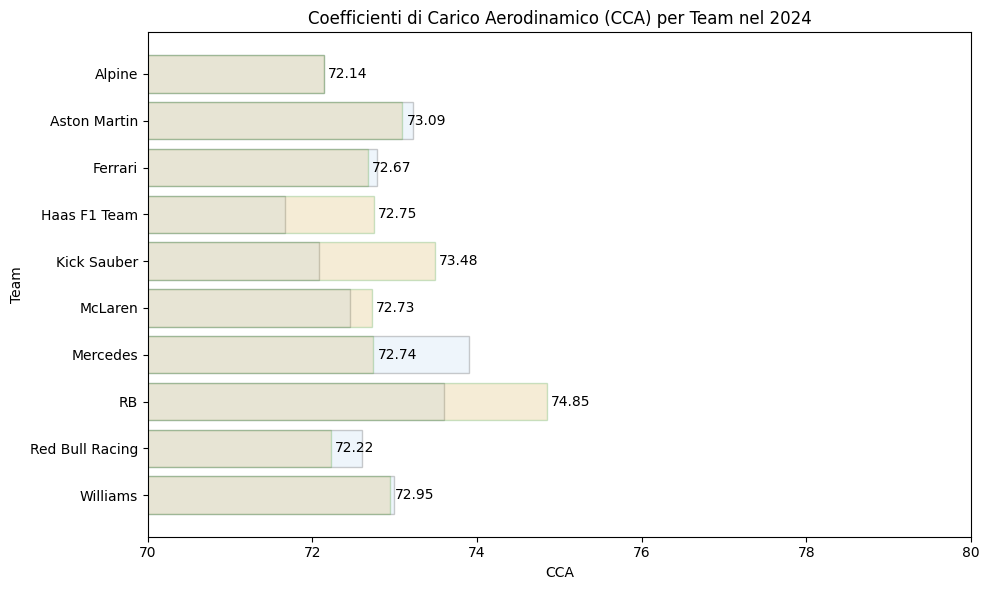

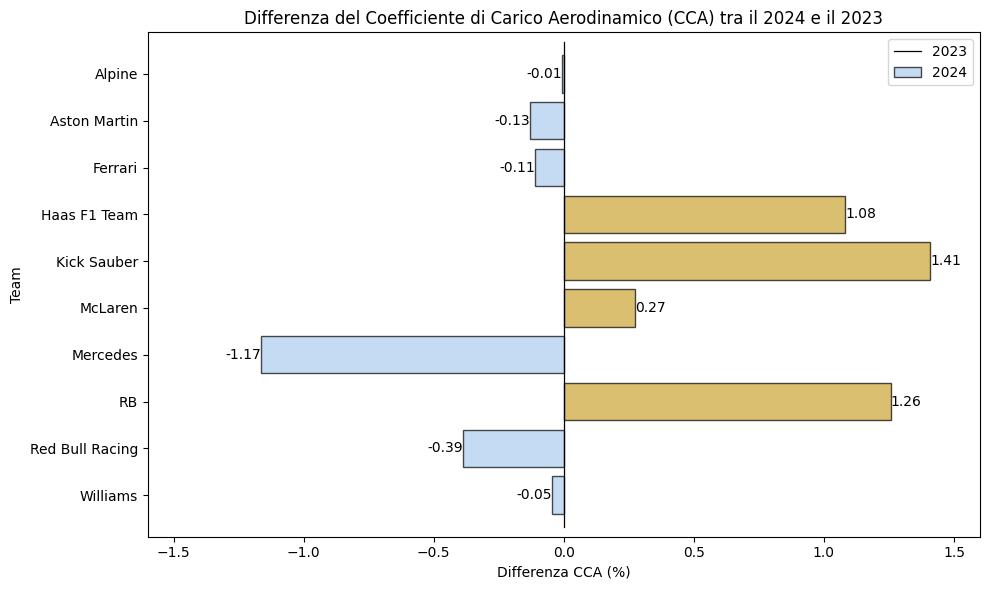

In [105]:
#velocità media qualifiche 2024
avg_speed_2024 = Q.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2024 = avg_speed_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2024 = avg_speed_2024.assign(SpeedAvg=speedAvg2024)
avg_speed_2024 = avg_speed_2024.reset_index(drop=True)

#velocità media qualifiche 2023
avg_speed_2023 = Q2023.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2023 = avg_speed_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2023 = avg_speed_2023.assign(SpeedAvg=speedAvg2023)
avg_speed_2023 = avg_speed_2023.reset_index(drop=True)

# ottengo la velocità media per scuderia
avg_media_per_scuderia_2023 = avg_speed_2023[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)
avg_media_per_scuderia_2024 = avg_speed_2024[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)

#ottengo i singoli team
team = pd.unique(Q.laps['Team'])

# creo un dataframe per i team con la velocità media e la velocità massima
max_speed_team_2024 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
max_speed_team_2023 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
for i in team:
    max_speed = Q.laps[Q.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2024[avg_speed_2024['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2024 = pd.concat([max_speed_team_2024, row])

    if i == 'Kick Sauber':
        i = 'Alfa Romeo'

    if i == 'RB':
        i = 'AlphaTauri'

    max_speed = Q2023.laps[Q2023.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2023[avg_speed_2023['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2023 = pd.concat([max_speed_team_2023, row])

# calcolo cca del 2024
max_speed_team_2024 = max_speed_team_2024.sort_values(by='Team', ascending=False)
CCA_scuderie_2024 = max_speed_team_2024['SpeedAvg'] / max_speed_team_2024['SpeedST']
CCA_scuderie_2024 = CCA_scuderie_2024 * 100

# calcolo cca del 2023
max_speed_team_2023['Team'] = max_speed_team_2023['Team'].replace({'AlphaTauri': 'RB', 'Alfa Romeo': 'Kick Sauber'})
max_speed_team_2023 = max_speed_team_2023.sort_values(by='Team', ascending=False)

CCA_scuderie_2023 = max_speed_team_2023['SpeedAvg'] / max_speed_team_2023['SpeedST']
CCA_scuderie_2023 = CCA_scuderie_2023 * 100

plt.figure(figsize=(10, 6))
plt.barh(max_speed_team_2023['Team'], CCA_scuderie_2023, color=colors_palette['2023'], edgecolor='black', alpha=0.2)

plt.barh(max_speed_team_2024['Team'], CCA_scuderie_2024, color=colors_palette['2024'], edgecolor='green', alpha=0.2)
plt.xlabel('CCA')
plt.ylabel('Team')
plt.title('Coefficienti di Carico Aerodinamico (CCA) per Team nel 2024')
plt.xlim(70,80)
plt.tight_layout()
for index, value in enumerate(CCA_scuderie_2024):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')
plt.show()

# Calcolo la differenza tra i CCA del 2024 e del 2023
CCA_diff = CCA_scuderie_2024.values - CCA_scuderie_2023.values

# Creo un grafico a barre divergenti
plt.figure(figsize=(10, 6))
colors = [colors_palette['2024'] if x > 0 else colors_palette['2023'] for x in CCA_diff]
plt.barh(max_speed_team_2024['Team'], CCA_diff, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Differenza CCA (%)')
plt.ylabel('Team')
plt.xlim(-1.6, 1.6)
plt.title('Differenza del Coefficiente di Carico Aerodinamico (CCA) tra il 2024 e il 2023')
plt.axvline(x=0, ymin=0.02 , ymax=0.98, color='black', linewidth=0.9)
plt.tight_layout()
plt.legend(['2023', '2024'])

# Aggiungo le etichette con i valori delle differenze
for index, value in enumerate(CCA_diff):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right' if value < 0 else 'left')

plt.show()

Grafico differenza tempo della pole 2023 2024 (grafico 1 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\2017723026.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


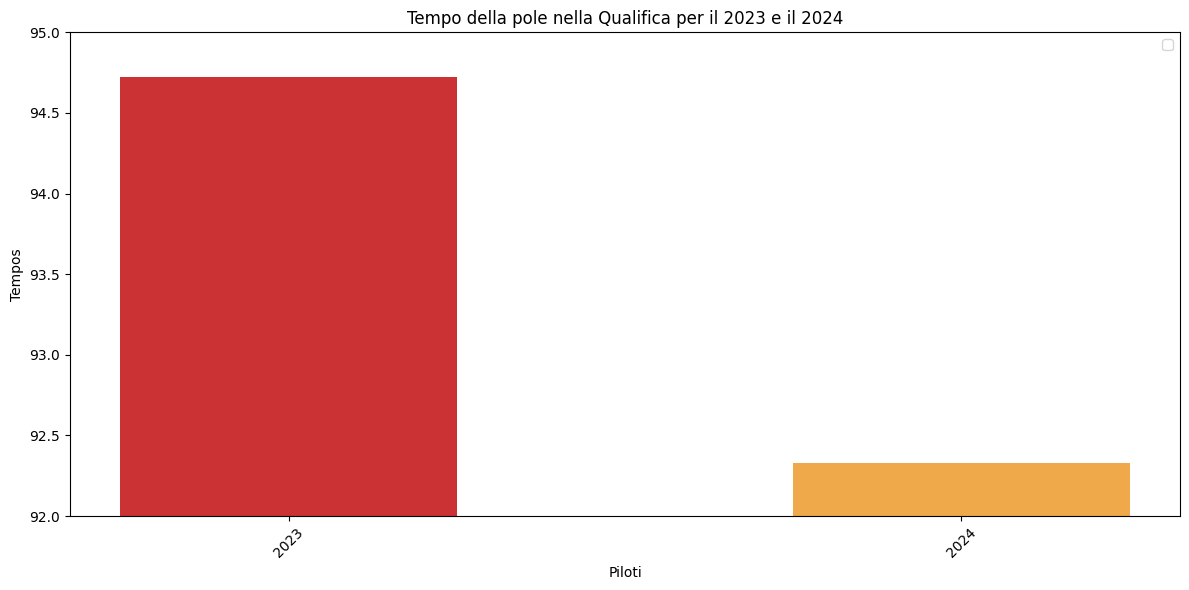

In [117]:
Q1_2023, _, Q3_2023 = Q2023.laps.split_qualifying_sessions()
Q1, _, Q3 = Q.laps.split_qualifying_sessions()

pole_2023 = Q3_2023.pick_fastest()[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
pole_2024 = Q3.pick_fastest()[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]

pole_2023['Year'] = '2023'
pole_2024['Year'] = '2024'

c = pd.concat([pole_2023, pole_2024])

color = [colors_palette[driver_team[drv]] for drv in ['LEC', 'NOR']]

plt.figure(figsize=(12, 6))
plt.bar(c["Year"], c['LapTime'].apply(lambda x: x.total_seconds()), color=color, width=0.5)

plt.xlabel('Piloti')
plt.ylabel('Tempos')
plt.title('Tempo della pole nella Qualifica per il 2023 e il 2024')
plt.legend()
plt.ylim(92, 95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico differenze nei tempi delle pole 2023 2024 e degli ultimi classificati (opzione del grafico 2 della scaletta)

In [96]:
Q2022 = ff1.get_session(2022, 'Austin', 4)
Q2022.load()

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '16', '1', '11', '44', '63', '18', '4', '14', '77', '23', '5', '10', '24', '22', '20', '3', '31', '47', '6']


C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\385339501.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


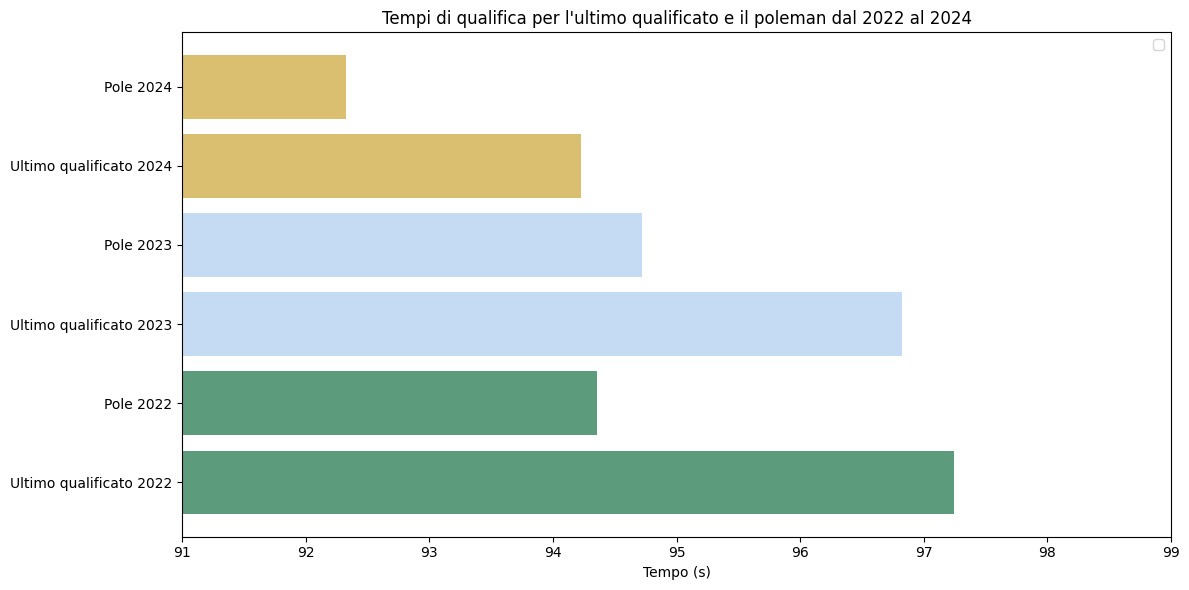

In [103]:
last_qualified_2023 = Q1_2023.pick_drivers('SAR').pick_fastest()[['Driver', 'LapTime']]
last_qualified_2024 = Q1.pick_drivers('ZHO').pick_fastest()[['Driver', 'LapTime']]

pole_2024['Label'] = 'Pole 2024'
pole_2023['Label'] = 'Pole 2023'

last_qualified_2024['Label'] = 'Ultimo qualificato 2024'
last_qualified_2023['Label'] = 'Ultimo qualificato 2023'

c = pd.concat([last_qualified_2023, pole_2023, last_qualified_2024, pole_2024])

Q1_2022, _, Q3_2022 = Q2022.laps.split_qualifying_sessions()

pole_2022 = Q3_2022.pick_fastest()[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
pole_2022['Year'] = '2022'
pole_2022['Label'] = 'Pole 2022'

last_qualified_2022 = Q1_2022.pick_drivers('LAT').pick_fastest()[['Driver', 'LapTime']]
last_qualified_2022['Year'] = '2022'
last_qualified_2022['Label'] = 'Ultimo qualificato 2022'

c = pd.concat([last_qualified_2022, pole_2022, last_qualified_2023, pole_2023, last_qualified_2024, pole_2024])

color = [colors_palette[pl] for pl in ['SQ', 'SQ', '2023', '2023', '2024', '2024']]

plt.figure(figsize=(12, 6))
plt.barh(c["Label"], c['LapTime'].apply(lambda x: x.total_seconds()), color=color, alpha=0.7)
plt.xlabel('Tempo (s)')
plt.title('Tempi di qualifica per l\'ultimo qualificato e il poleman dal 2022 al 2024')
plt.legend()
plt.xlim(91, 99)
plt.tight_layout()
plt.show()

Grafico intertempi qualifiche delle pole tra 2023 e 2024 (opzione grafico 2 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\3759260764.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time_sector_2023 = pd.concat([time_sector_2023, pd.DataFrame({'Label': ['Intertempo '], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector1Time']], 'Year': [pole_2023['Year']]})])
C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_24412\3759260764.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time_sector_2024 = pd.concat([time_sector_2024, pd.DataFrame({'La

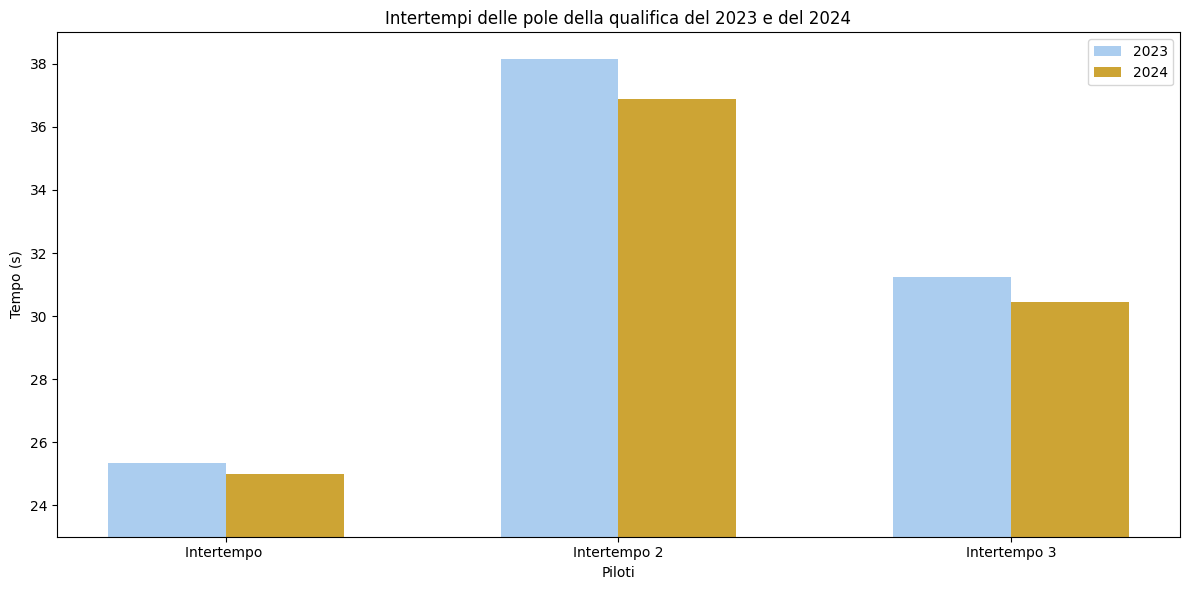

In [118]:
time_sector_2023 = pd.DataFrame(columns=['Label', 'Driver', 'SectorTime', 'Year'])
time_sector_2023 = pd.concat([time_sector_2023, pd.DataFrame({'Label': ['Intertempo '], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector1Time']], 'Year': [pole_2023['Year']]})])
time_sector_2023 = pd.concat([time_sector_2023, pd.DataFrame({'Label': ['Intertempo 2'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector2Time']], 'Year': [pole_2023['Year']]})])
time_sector_2023 = pd.concat([time_sector_2023, pd.DataFrame({'Label': ['Intertempo 3'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector3Time']], 'Year': [pole_2023['Year']]})])

time_sector_2024 = pd.DataFrame(columns=['Label', 'Driver', 'SectorTime', 'Year'])
time_sector_2024 = pd.concat([time_sector_2024, pd.DataFrame({'Label': ['Intertempo 1 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector1Time']], 'Year': [pole_2024['Year']]})])
time_sector_2024 = pd.concat([time_sector_2024, pd.DataFrame({'Label': ['Intertempo 2 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector2Time']], 'Year': [pole_2024['Year']]})])
time_sector_2024 = pd.concat([time_sector_2024, pd.DataFrame({'Label': ['Intertempo 3 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector3Time']], 'Year': [pole_2024['Year']]})])

plt.figure(figsize=(12, 6))

bar_width = 0.30
index = np.arange(len(time_sector_2023.index))

plt.bar(index, time_sector_2023['SectorTime'].apply(lambda x: x.total_seconds()), width=bar_width, color=colors_palette['2023'], label='2023')
plt.bar(index + bar_width, time_sector_2024['SectorTime'].apply(lambda x: x.total_seconds()), width=bar_width, color=colors_palette['2024'], label='2024')
plt.xticks(index + bar_width / 2, time_sector_2023['Label'])

plt.xlabel('Piloti')
plt.ylabel('Tempo (s)')
plt.title('Intertempi delle pole della qualifica del 2023 e del 2024')
plt.legend()
plt.ylim(23, 39)
plt.tight_layout()
plt.show()

Grafico temperatura dell'aria nelle sessioni di qualifica (opzione 5 della scaletta)


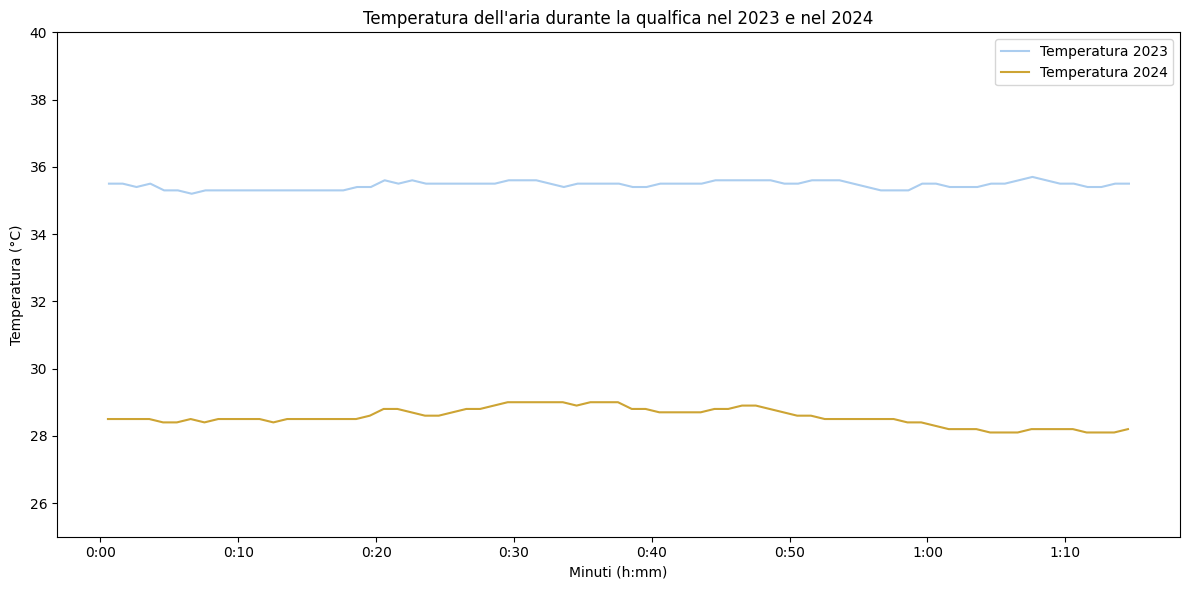

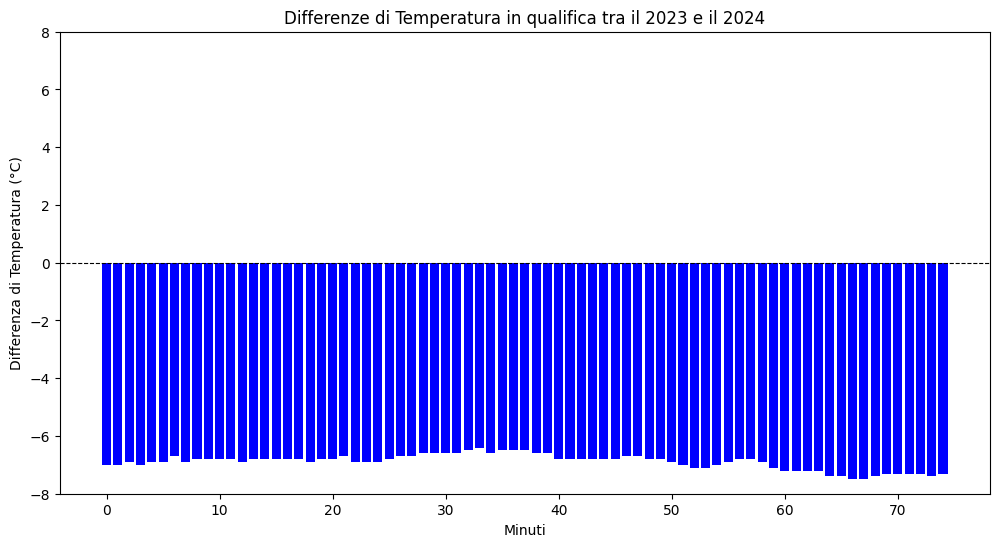

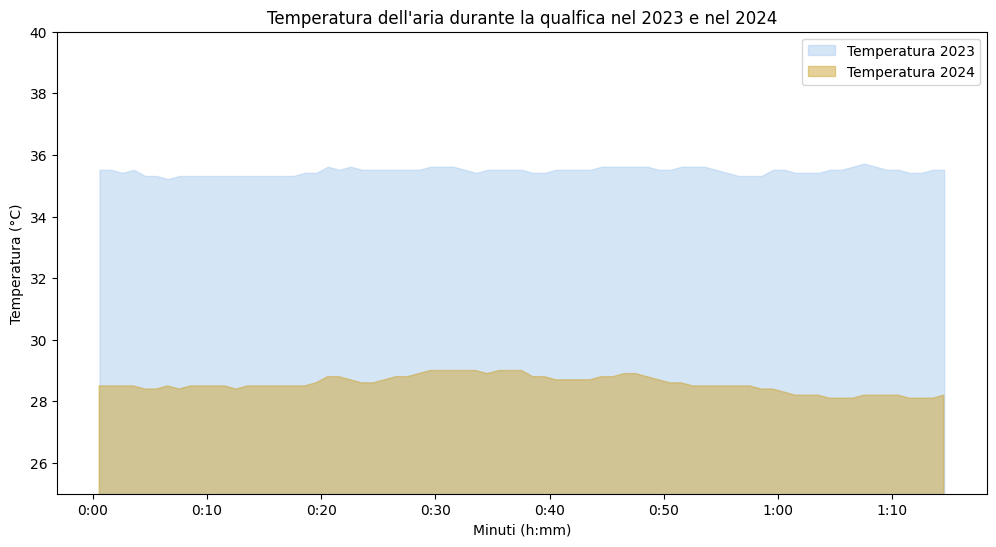

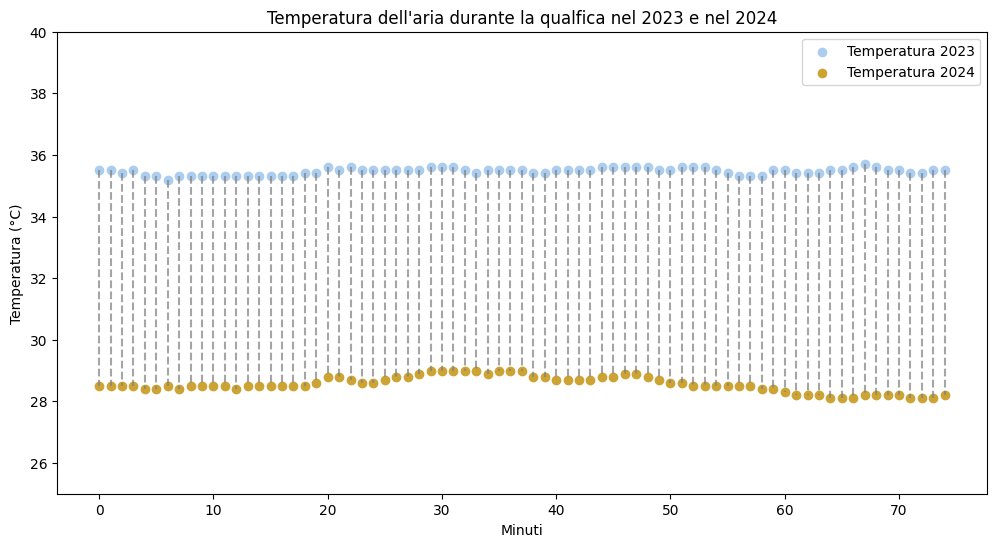

In [130]:
temperaure2024 = Q.weather_data[['Time', 'AirTemp', 'Humidity', 'TrackTemp']]
temperaure2023 = Q2023.weather_data[['Time', 'AirTemp', 'Humidity', 'TrackTemp']].head(75)
plt.figure(figsize=(12, 6))

plt.plot(temperaure2023['Time'], temperaure2023['AirTemp'], color=colors_palette['2023'], label='Temperatura 2023')
plt.plot(temperaure2024['Time'], temperaure2024['AirTemp'], color=colors_palette['2024'], label='Temperatura 2024')

plt.xlabel('Minuti (h:mm)') 
plt.ylabel('Temperatura (°C)')
plt.title("Temperatura dell'aria durante la qualfica nel 2023 e nel 2024")
plt.legend()
plt.ylim(25,40)
plt.tight_layout()
plt.show()

temperature_diff = temperaure2024['AirTemp'].values - temperaure2023['AirTemp'].values

# Grafico delle differenze
plt.figure(figsize=(12, 6))
plt.bar(temperaure2023.index, temperature_diff, color=['red' if d >= 0 else 'blue' for d in temperature_diff])
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Minuti')
plt.ylabel('Differenza di Temperatura (°C)')
plt.ylim(-8, 8)
plt.title('Differenze di Temperatura in qualifica tra il 2023 e il 2024')
plt.show()

# grafico a riempimento
plt.figure(figsize=(12, 6))
plt.fill_between(temperaure2023['Time'], temperaure2023['AirTemp'], alpha=0.5, label="Temperatura 2023", color=colors_palette['2023'])
plt.fill_between(temperaure2024['Time'], temperaure2024['AirTemp'], alpha=0.5, label="Temperatura 2024", color=colors_palette['2024'])

# Dettagli del grafico
plt.xlabel('Minuti (h:mm)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura dell\'aria durante la qualfica nel 2023 e nel 2024')
plt.ylim(25, 40)
plt.legend()
plt.show()

# Creazione del grafico a punti con differene
plt.figure(figsize=(12, 6))
plt.scatter(temperaure2023.index, temperaure2023['AirTemp'], color=colors_palette['2023'], label="Temperatura 2023")
plt.scatter(temperaure2024.index, temperaure2024['AirTemp'], color=colors_palette['2024'], label="Temperatura 2024")

# Linee che collegano i punti
for i in range(len(temperaure2024.index)):
    plt.plot([temperaure2023.index[i], temperaure2024.index[i]], [temperaure2023['AirTemp'][i], temperaure2024['AirTemp'][i]],
             color='gray', linestyle='--', alpha=0.7)

# Dettagli del grafico
plt.xlabel('Minuti')
plt.ylim(25, 40)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura dell\'aria durante la qualfica nel 2023 e nel 2024')
plt.legend()
plt.show()

Grafico temperatura del tracciato nelle sessioni di qualifica (opzione 5 della scaletta)

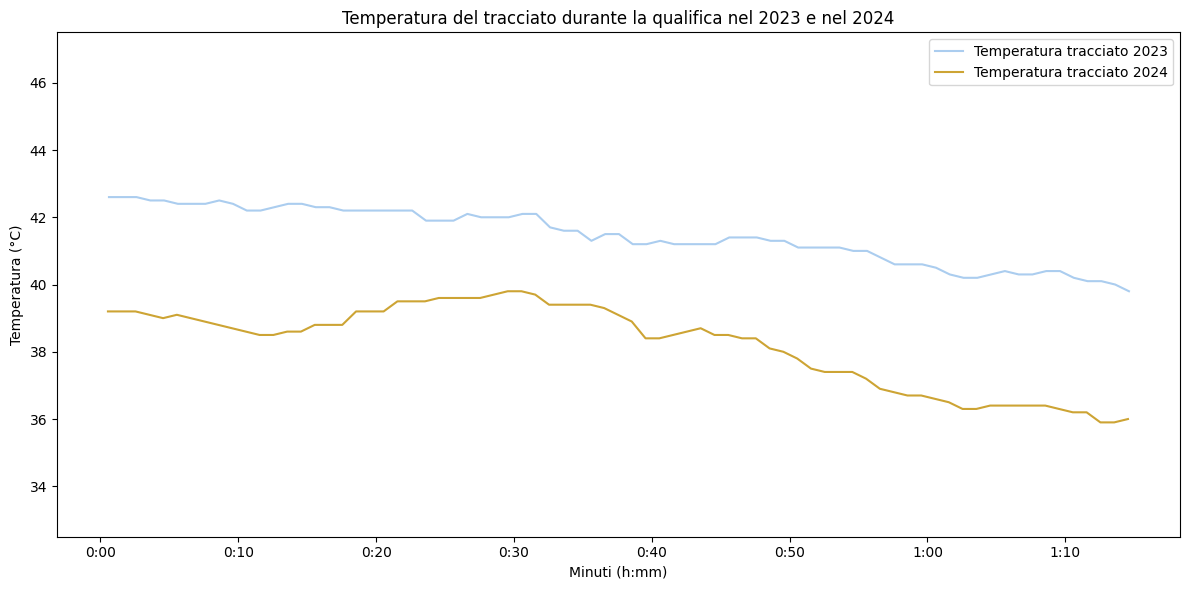

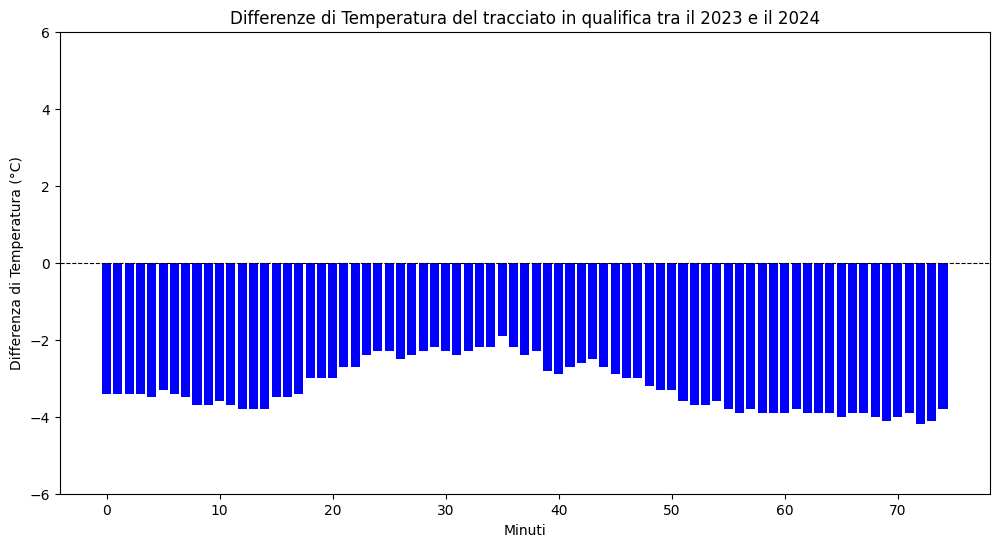

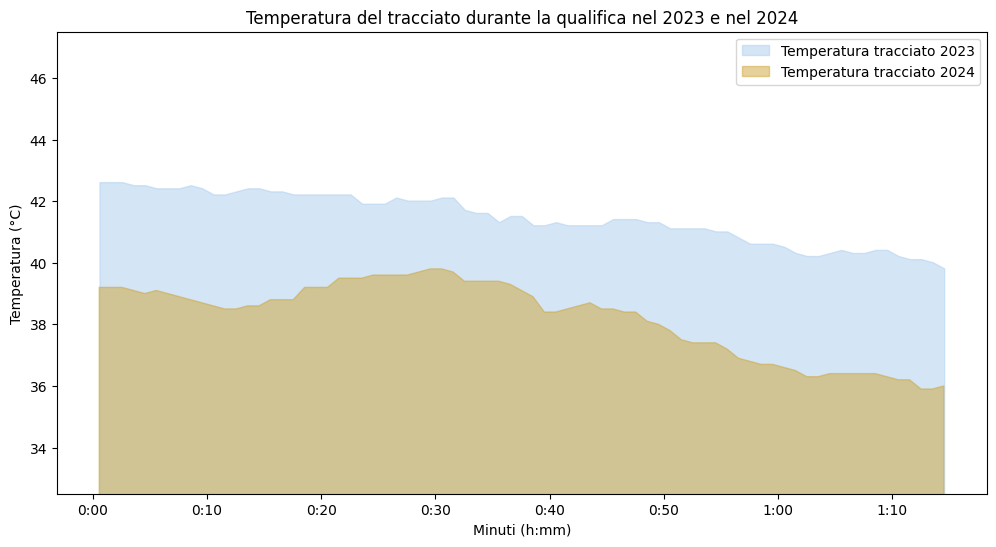

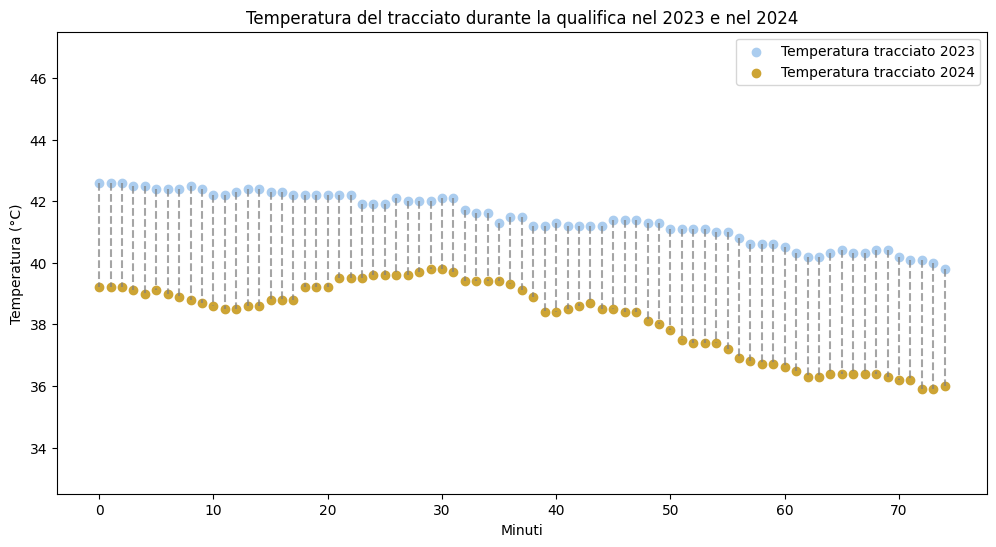

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(temperaure2023['Time'], temperaure2023['TrackTemp'], color=colors_palette['2023'], label='Temperatura tracciato 2023')
plt.plot(temperaure2024['Time'], temperaure2024['TrackTemp'], color=colors_palette['2024'], label='Temperatura tracciato 2024')

plt.xlabel('Minuti (h:mm)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura del tracciato durante la qualifica nel 2023 e nel 2024')
plt.legend()
plt.ylim(32.5, 47.5)
plt.tight_layout()
plt.show()

temperature_diff = temperaure2024['TrackTemp'].values - temperaure2023['TrackTemp'].values

# Grafico delle differenze
plt.figure(figsize=(12, 6))
plt.bar(temperaure2023.index, temperature_diff, color=['red' if d >= 0 else 'blue' for d in temperature_diff])
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Minuti')
plt.ylabel('Differenza di Temperatura (°C)')
plt.ylim(-6, 6)
plt.title('Differenze di Temperatura del tracciato in qualifica tra il 2023 e il 2024')
plt.show()

# grafico a riempimento
plt.figure(figsize=(12, 6))
plt.fill_between(temperaure2023['Time'], temperaure2023['TrackTemp'], alpha=0.5, label="Temperatura tracciato 2023", color=colors_palette['2023'])
plt.fill_between(temperaure2024['Time'], temperaure2024['TrackTemp'], alpha=0.5, label="Temperatura tracciato 2024", color=colors_palette['2024'])

# Dettagli del grafico
plt.xlabel('Minuti (h:mm)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura del tracciato durante la qualifica nel 2023 e nel 2024')
plt.ylim(32.5, 47.5)
plt.legend()
plt.show()

# Creazione del grafico a punti con differenze
plt.figure(figsize=(12, 6))
plt.scatter(temperaure2023.index, temperaure2023['TrackTemp'], color=colors_palette['2023'], label="Temperatura tracciato 2023")
plt.scatter(temperaure2024.index, temperaure2024['TrackTemp'], color=colors_palette['2024'], label="Temperatura tracciato 2024")

# Linee che collegano i punti
for i in range(len(temperaure2024.index)):
    plt.plot([temperaure2023.index[i], temperaure2024.index[i]], [temperaure2023['TrackTemp'][i], temperaure2024['TrackTemp'][i]],
             color='gray', linestyle='--', alpha=0.7)

# Dettagli del grafico
plt.xlabel('Minuti')
plt.ylim(32.5, 47.5)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura del tracciato durante la qualifica nel 2023 e nel 2024')
plt.legend()
plt.show()


Grafico temperatura massima, media e minima dell'aria e del tracciato nella sessione di qualifica (opzione 5 della scaletta)


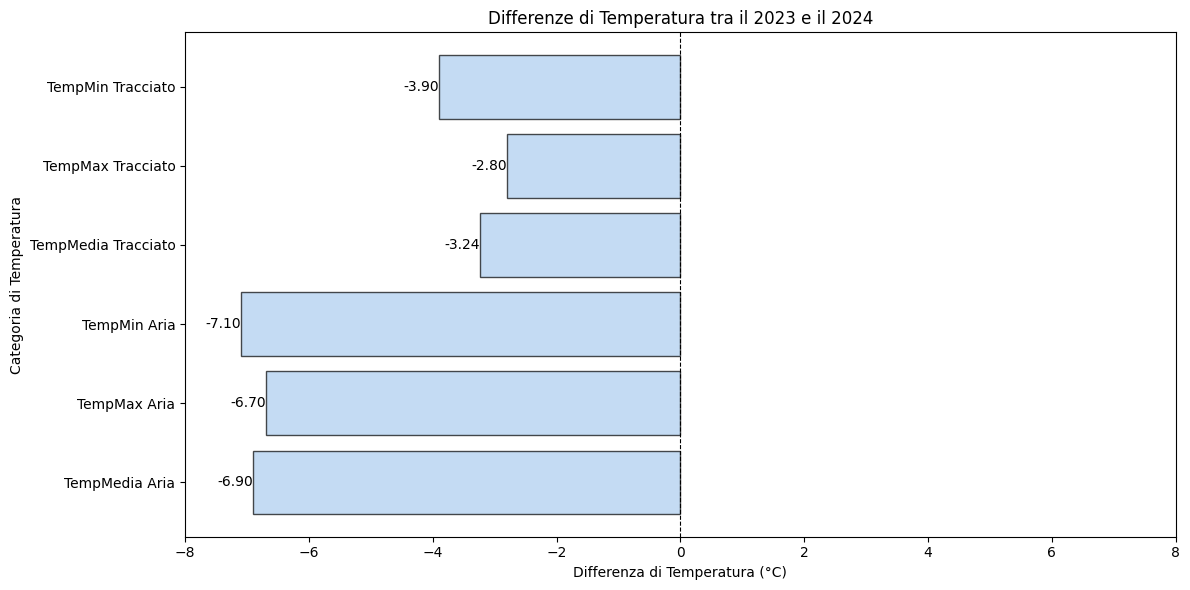

In [143]:
# Creazione del dataframe con le differenze di temperatura
temperature_diff = pd.DataFrame({
    'Label': ['TempMedia Aria', 'TempMax Aria', 'TempMin Aria', 'TempMedia Tracciato', 'TempMax Tracciato', 'TempMin Tracciato'],
    'Differenza': [
        air_temp_2024['TempMedia'].values[0] - air_temp_2023['TempMedia'].values[0],
        air_temp_2024['TempMax'].values[0] - air_temp_2023['TempMax'].values[0],
        air_temp_2024['TempMin'].values[0] - air_temp_2023['TempMin'].values[0],
        track_temp_2024['TempMedia'].values[0] - track_temp_2023['TempMedia'].values[0],
        track_temp_2024['TempMax'].values[0] - track_temp_2023['TempMax'].values[0],
        track_temp_2024['TempMin'].values[0] - track_temp_2023['TempMin'].values[0]
    ]
})

# Creazione del grafico a barre divergenti
plt.figure(figsize=(12, 6))
colors = [colors_palette['2024'] if x >= 0 else colors_palette['2023'] for x in temperature_diff['Differenza']]
plt.barh(temperature_diff['Label'], temperature_diff['Differenza'], color=colors, edgecolor='black', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Differenza di Temperatura (°C)')
plt.ylabel('Categoria di Temperatura')
plt.title('Differenze di Temperatura tra il 2023 e il 2024')
plt.tight_layout()
plt.xlim(-8, 8)

# Aggiunta delle etichette con i valori delle differenze
for index, value in enumerate(temperature_diff['Differenza']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right' if value < 0 else 'left')

plt.show()

Grafico distacco tra la pole del 2024 (tenuta fissa) e la pole del 2023, con indicazioni delle curve ()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


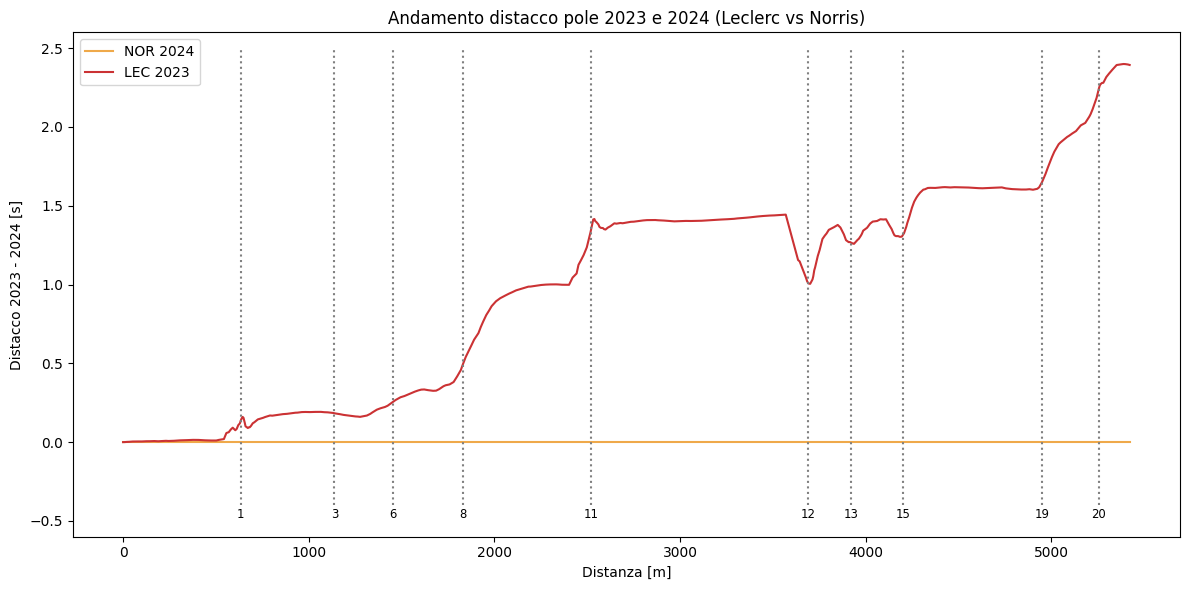

In [222]:
import fastf1.utils as f1u
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta

circuit_info = Q.get_circuit_info()
selected_corners = [i-1 for i in (1,3,6,8,11,12,13,15,19,20)]

lec_pole_2023 = Q3_2023.pick_drivers('LEC').pick_fastest()
nor_pole_2024 = Q3.pick_drivers('NOR').pick_fastest()

delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(nor_pole_2024, lec_pole_2023)
delta_time_nor, ref_tel_nor, compare_tel_nor = f1u.delta_time(nor_pole_2024, nor_pole_2024)

plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor['Distance'], delta_time_nor, color=colors_palette[driver_team['NOR']], label='NOR 2024')
plt.plot(ref_tel_nor['Distance'], delta_time_lec, color=colors_palette[driver_team['LEC']], label='LEC 2023')

for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance'], -.45, txt,
                va='center_baseline', ha='center', size='small')
        
plt.ylabel(f"Distacco 2023 - 2024 [s]")
plt.xlabel('Distanza [m]')
#ax[1].legend()
plt.ylim([-0.6,2.6])
plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=-.4, ymax=2.5,
          linestyles='dotted', colors='grey')
plt.title('Andamento distacco pole 2023 e 2024 (Leclerc vs Norris)')
plt.tight_layout()
plt.legend()
plt.show()


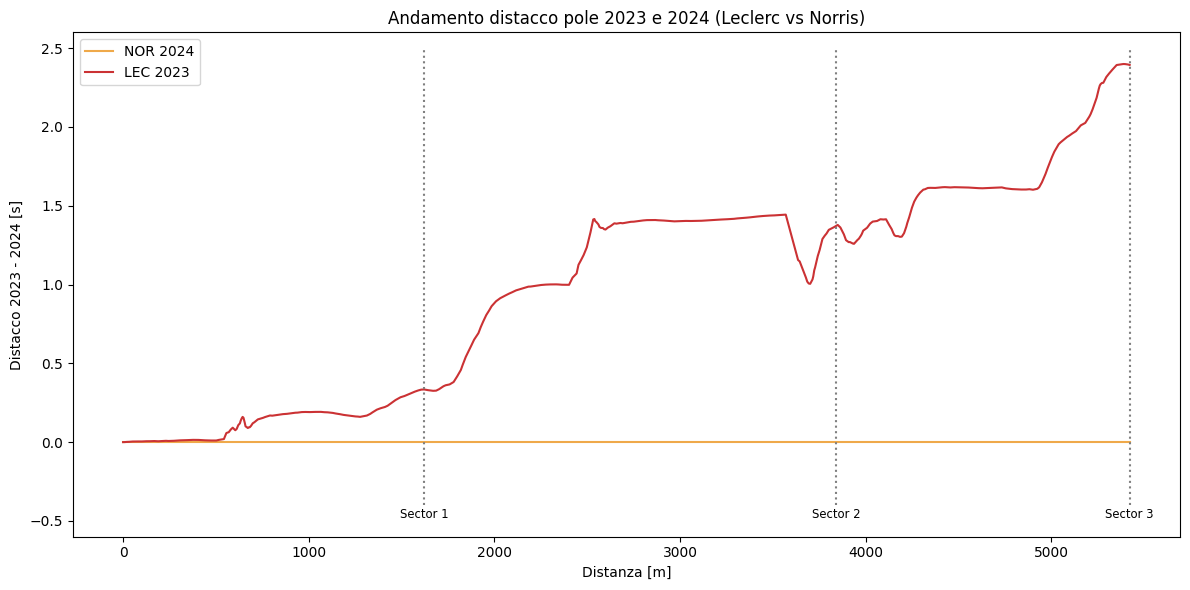

In [205]:
i1 = [0, nor_pole_2024['Sector1Time']]
i2 = [i1[1], i1[1] + nor_pole_2024['Sector2Time']]
i3 = [i2[1], nor_pole_2024['Sector2Time'] + nor_pole_2024['Sector3Time']]

ref_tel_nor_sect1 = ref_tel_nor.loc[ref_tel_nor['Time'] <= i1[1]]
ref_tel_nor_sect2 = ref_tel_nor.loc[(ref_tel_nor['Time'] > i2[0]) & (ref_tel_nor['Time'] <= i2[1])]
ref_tel_nor_sect3 = ref_tel_nor.loc[(ref_tel_nor['Time'] > i3[0])]

delta_time_nor_sector1 = delta_time_nor.iloc[:len(ref_tel_nor_sect1)]
delta_time_nor_sector2 = delta_time_nor.iloc[len(ref_tel_nor_sect1):len(ref_tel_nor_sect1)+len(ref_tel_nor_sect2)]
delta_time_nor_sector3 = delta_time_nor.iloc[len(ref_tel_nor_sect1)+len(ref_tel_nor_sect2):]

delta_time_lec_sector1 = delta_time_lec.iloc[:len(ref_tel_nor_sect1)]
delta_time_lec_sector2 = delta_time_lec.iloc[len(ref_tel_nor_sect1):len(ref_tel_nor_sect1) + len(ref_tel_nor_sect2)]
delta_time_lec_sector3 = delta_time_lec.iloc[len(ref_tel_nor_sect1) + len(ref_tel_nor_sect2):]

distanza_sec1 = ref_tel_nor_sect1['Distance'].iloc[-1]
distanza_sec2 = ref_tel_nor_sect2['Distance'].iloc[-1]
distanza_sec3 = ref_tel_nor_sect3['Distance'].iloc[-1]
sect = [distanza_sec1, distanza_sec2, distanza_sec3]
names = ['Sector 1', 'Sector 2', 'Sector 3']

# grafico completo con i settori
plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor['Distance'], delta_time_nor, color=colors_palette[driver_team['NOR']], label='NOR 2024')
plt.plot(ref_tel_nor['Distance'], delta_time_lec, color=colors_palette[driver_team['LEC']], label='LEC 2023')

i = 0
for sct in sect:
    plt.vlines(x=sct, ymin=-0.4, ymax=2.5, linestyles='dotted', colors='grey')
    plt.text(sct, -.45, names[i],
                va='center_baseline', ha='center', size='small')
    i+=1
        
plt.ylabel(f"Distacco 2023 - 2024 [s]")
plt.xlabel('Distanza [m]')
plt.ylim([-0.6,2.6])

plt.title('Andamento distacco pole 2023 e 2024 (Leclerc vs Norris)')
plt.tight_layout()
plt.legend()
plt.show()

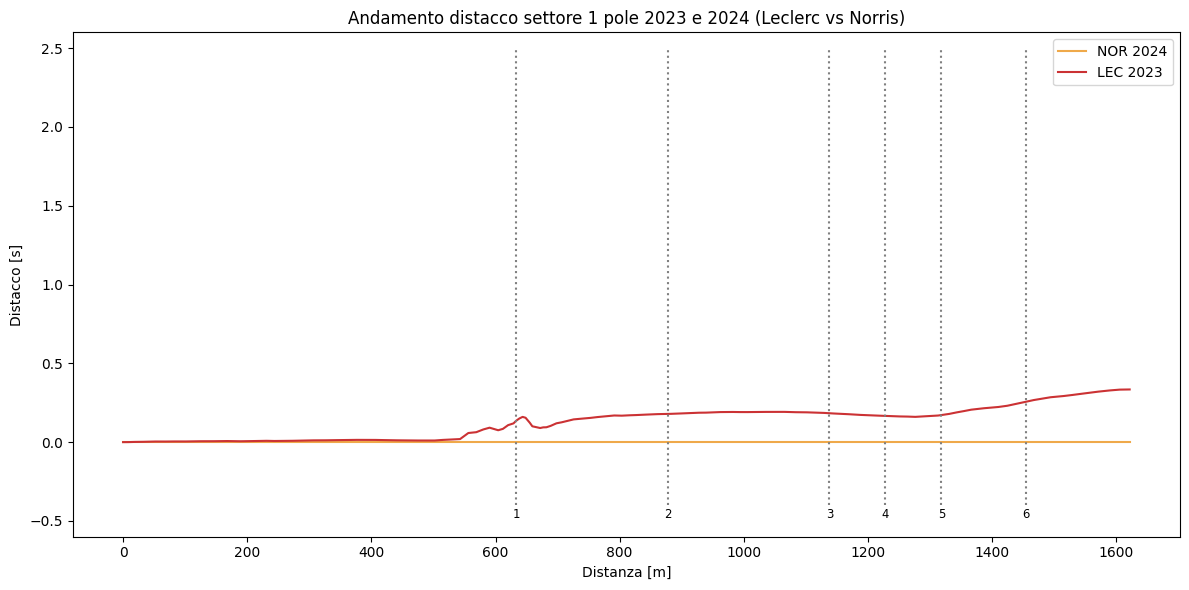

In [206]:
corner_sec1 = circuit_info.corners[circuit_info.corners['Distance'] <= sect[0]]
corner_sec2 = circuit_info.corners[(circuit_info.corners['Distance'] > sect[0]) & (circuit_info.corners['Distance'] <= sect[1])]
corner_sec3 = circuit_info.corners[circuit_info.corners['Distance'] > sect[1]]

# grafico settore 1
plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor_sect1['Distance'], delta_time_nor_sector1, color=colors_palette[driver_team['NOR']], label='NOR 2024')
plt.plot(ref_tel_nor_sect1['Distance'], delta_time_lec_sector1, color=colors_palette[driver_team['LEC']], label='LEC 2023')

for _, corner in corner_sec1.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    plt.text(corner['Distance'], -.45, txt,
            va='center_baseline', ha='center', size='small')
    plt.vlines(x=corner['Distance'], ymin=-0.4, ymax=2.5, linestyles='dotted', colors='grey')
        
plt.ylabel(f"Distacco [s]")
plt.xlabel('Distanza [m]')
plt.ylim([-0.6,2.6])

plt.title('Andamento distacco settore 1 pole 2023 e 2024 (Leclerc vs Norris)')
plt.tight_layout()
plt.legend()
plt.show()

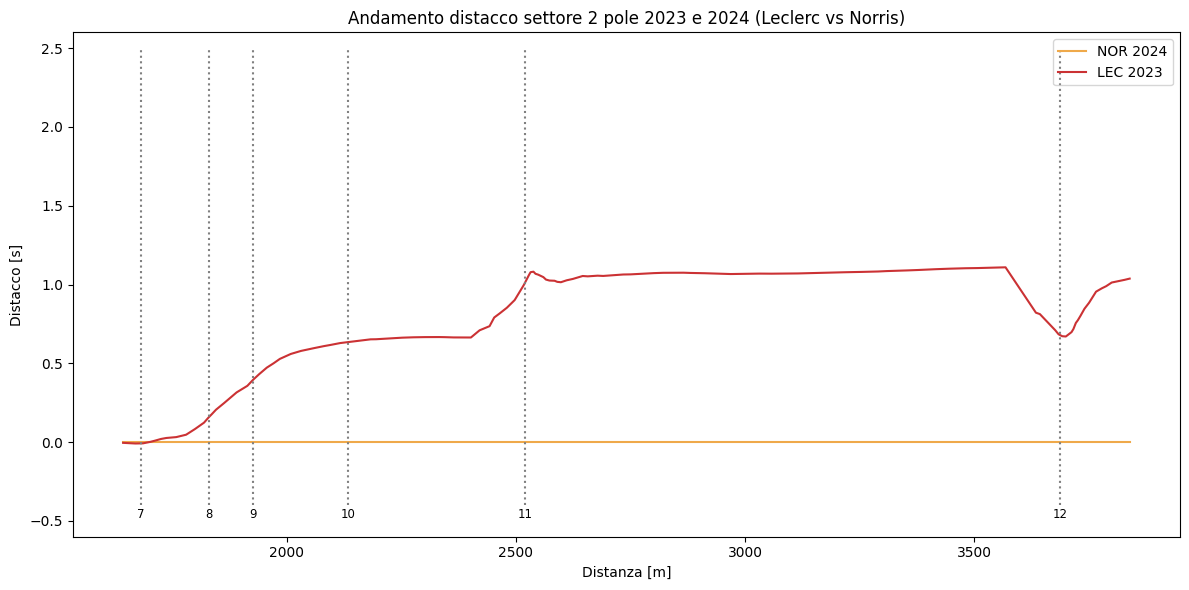

In [207]:
# grafico settore 2
distacco_precedente = delta_time_lec_sector1.iloc[-1]
delta_time_lec_sector2_modified = delta_time_lec_sector2 - distacco_precedente

plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor_sect2['Distance'], delta_time_nor_sector2, color=colors_palette[driver_team['NOR']], label='NOR 2024')
plt.plot(ref_tel_nor_sect2['Distance'], delta_time_lec_sector2_modified, color=colors_palette[driver_team['LEC']], label='LEC 2023')

for _, corner in corner_sec2.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    plt.text(corner['Distance'], -.45, txt,
            va='center_baseline', ha='center', size='small')
    plt.vlines(x=corner['Distance'], ymin=-0.4, ymax=2.5, linestyles='dotted', colors='grey')
        
plt.ylabel(f"Distacco [s]")
plt.xlabel('Distanza [m]')
plt.ylim([-0.6,2.6])

plt.title('Andamento distacco settore 2 pole 2023 e 2024 (Leclerc vs Norris)')
plt.tight_layout()
plt.legend()
plt.show()

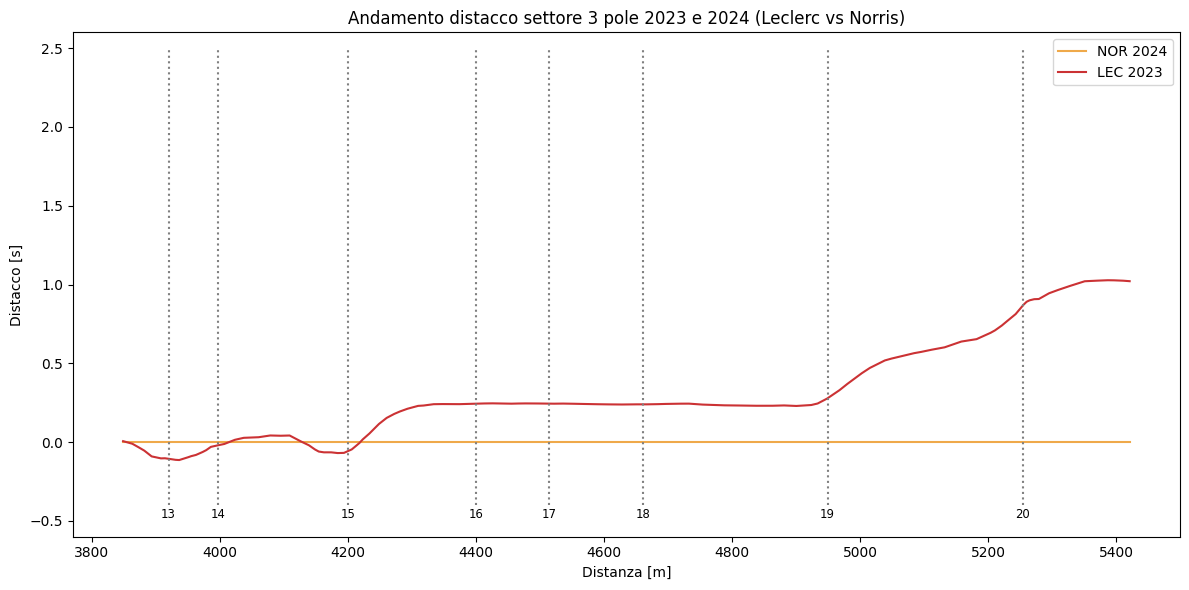

In [211]:
# grafico settore 3
distacco_precedentee = delta_time_lec_sector2.iloc[-1]
delta_time_lec_sector3_modified = delta_time_lec_sector3 - distacco_precedentee

plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor_sect3['Distance'], delta_time_nor_sector3, color=colors_palette[driver_team['NOR']], label='NOR 2024')
plt.plot(ref_tel_nor_sect3['Distance'], delta_time_lec_sector3_modified, color=colors_palette[driver_team['LEC']], label='LEC 2023')

for _, corner in corner_sec3.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    plt.text(corner['Distance'], -.45, txt,
            va='center_baseline', ha='center', size='small')
    plt.vlines(x=corner['Distance'], ymin=-0.4, ymax=2.5, linestyles='dotted', colors='grey')
        
plt.ylabel(f"Distacco [s]")
plt.xlabel('Distanza [m]')
plt.ylim([-0.6,2.6])

plt.title('Andamento distacco settore 3 pole 2023 e 2024 (Leclerc vs Norris)')
plt.tight_layout()
plt.legend()
plt.show()

Adesso ottengo la mappa del circuito

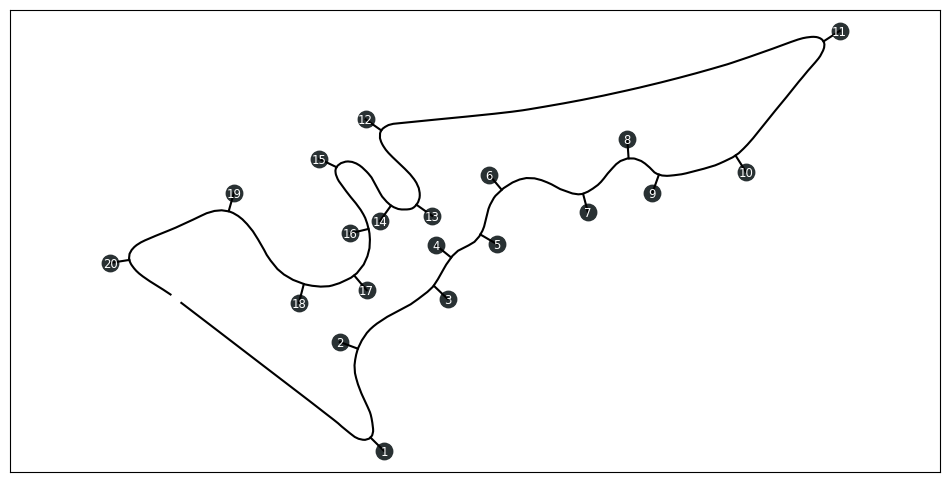

In [219]:
lap = Q.laps.pick_fastest()
pos = lap.get_pos_data()

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

plt.figure(figsize=(12, 6))
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color = 'black')

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Highlight the section between corner 9 and corner 12
highlight_start = circuit_info.corners.loc[circuit_info.corners['Number'] == 9, ['X', 'Y']].values[0]
highlight_end = circuit_info.corners.loc[circuit_info.corners['Number'] == 12, ['X', 'Y']].values[0]

highlight_start = rotate(highlight_start, angle=track_angle)
highlight_end = rotate(highlight_end, angle=track_angle)

highlight_section = track[(track[:, 0] >= highlight_start[0]) & (track[:, 0] <= highlight_end[0])]

plt.plot(highlight_section[:, 0], highlight_section[:, 1], color='yellow', linewidth=10)

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='#293133', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='black')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')


plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()


Grafico uso dell'acceleratore tra le due pole

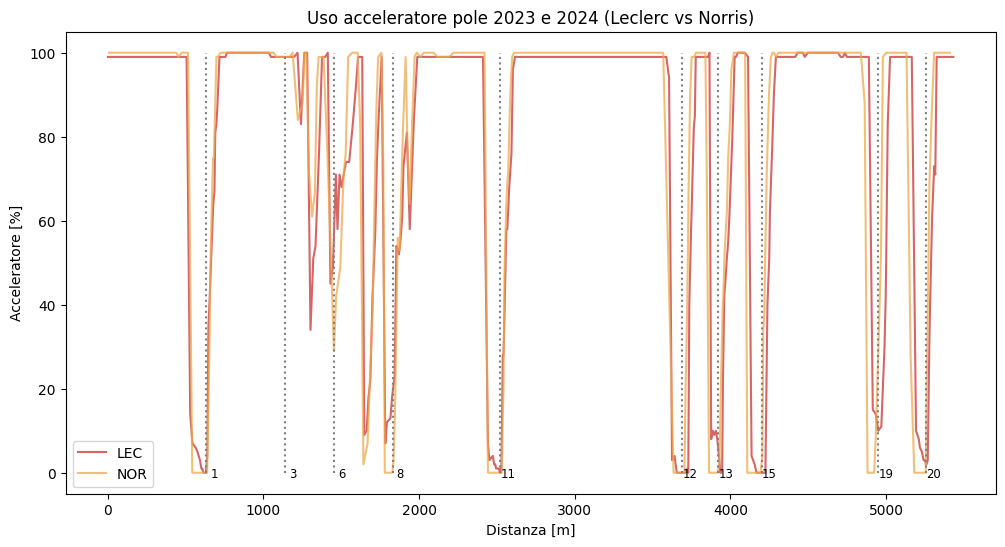

In [224]:
telemetry_lec_pole_2023 = lec_pole_2023.get_car_data().add_distance()
telemetry_nor_pole_2024 = nor_pole_2024.get_car_data().add_distance()

plt.figure(figsize=(12, 6))
plt.plot(telemetry_lec_pole_2023['Distance'], telemetry_lec_pole_2023['Throttle'], color = colors_palette[driver_team['LEC']], label = 'LEC', alpha=.75)
plt.plot(telemetry_nor_pole_2024['Distance'], telemetry_nor_pole_2024['Throttle'], color = colors_palette[driver_team['NOR']], label = 'NOR', alpha=.75)

# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance']+50, 0, txt,
                va='center_baseline', ha='center', size='small')
 
plt.ylabel('Acceleratore [%]')
plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=100,linestyles='dotted', colors='grey')
plt.xlabel('Distanza [m]')
plt.title('Uso acceleratore pole 2023 e 2024 (Leclerc vs Norris)')
plt.legend()
plt.show()

Grafico velocità delle due pole

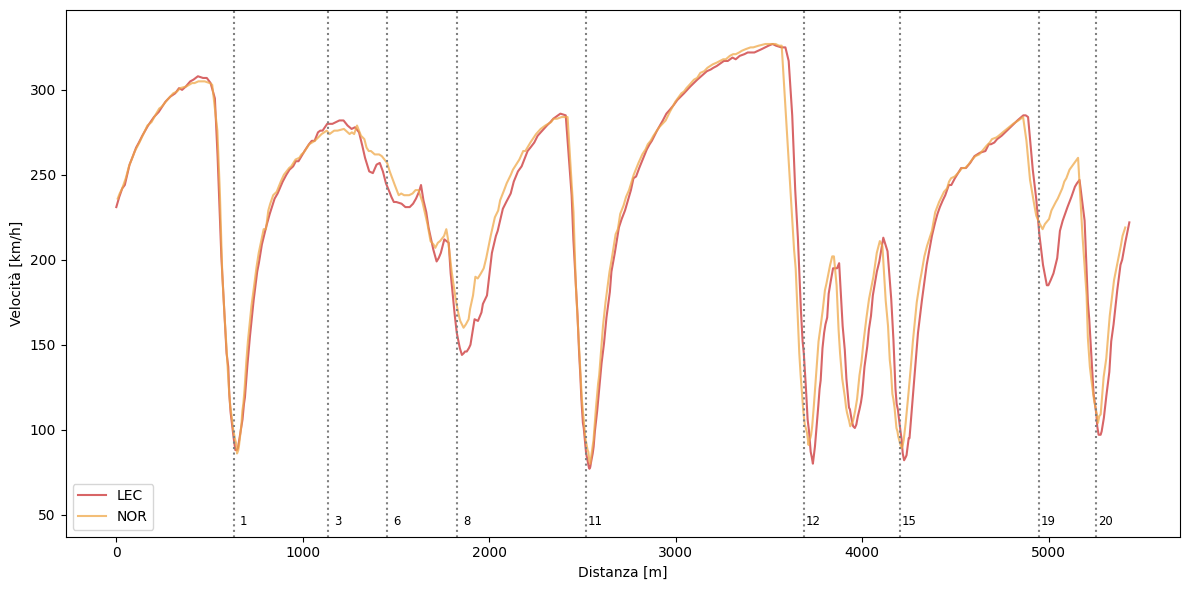

In [226]:
plt.figure(figsize=(12, 6))
plt.plot(telemetry_lec_pole_2023['Distance'], telemetry_lec_pole_2023['Speed'], color = colors_palette[driver_team['LEC']], label = 'LEC', alpha=.75)
plt.plot(telemetry_nor_pole_2024['Distance'], telemetry_nor_pole_2024['Speed'], color = colors_palette[driver_team['NOR']], label = 'NOR', alpha=.75)
 
plt.ylabel('Velocità [km/h]')

plt.legend(loc='lower left')

selected_corners = [i-1 for i in (1,3,6,8,11,12,15,19,20)]
v_min = telemetry_lec_pole_2023['Speed'].min()
v_max = telemetry_nor_pole_2024['Speed'].max()

plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-50, ymax=v_max+20,
             linestyles='dotted', colors='grey')

# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance']+50, v_min-30, txt,
                va='center_baseline', ha='center', size='small')

plt.ylim([v_min - 40, v_max + 20])
plt.xlabel('Distanza [m]')
plt.tight_layout()
plt.show()